# Methodology

The approach we adopted for the analysis of this dataset follows a standard methodology used in machine learning. We first begin by looking at the data, from a descriptive statistics perspective, then we try to visualize the dataset in order to have a general idea.

In order to apply any machine learning algorithm, we need to transform the data into a format that will minimize the error propagation due to the difference in the way different features were measured and reported. We apply several techniques like rescaling and normalization. This step is necessary to make sure our odels are accurate and generalizable.

We then need to take a look at our features one by one. We need to know what feature combination impact the most the performance of our models. TO do that, several techniques for feature selection exist, and we will apply some of them to our dataset in order to pick the most important ones to use in our models.

We will mainly be doing classification in this dataset, but we might do some regression as well. We will be applying different approaches to our data and measure the accuracy of our models to pick the winning solution.

The general approach in this notebook is summarized in the figure below:

![approach](./images/approach.png)  


After looking at the data sent by Kollmann's lab members, I decided to go with the vertical dataset for the reasons below :

- The horizontal dataset represents data points per mouse (rows) and visits (columns). THis is an interesting view of the experiment and the most obvious way to describe the visits and the observations, unfortunately, reducing the number of instances (rows) to a row per mouse, reduces the size of the dataset to be used by some classification algorithm, which will lead to models that are not generalizable
- Some data points were not entered and are missing. Usually when these missing values are rare in a dataset, one common approach will be the imputation of the missing values by using the average or the median values. But if these missing values are a big part of the dataset, the best approach to deal with them is to simply remove all the rows containing missing data. With the horizontal data set we might end up removing a lot of data which doesn't help.
- Assuming all visits in the vertical dataset are independent (which is not necessarily true), we can have a dataset with a decent size that can be used to split the dataset later into training/testing/validation datasets, or to do k-fold cross validation on some classification tasks

# Analysis Environment 

This analysis was done using open source tools mainly.

- [Python Anaconda](https://www.continuum.io/downloads)
- [Jupyter Notebook](http://jupyter.org/)

I also used [Tableau free edition](http://www.tableau.com/) for some visualizations.

# Understand the data

##  Descriptive Statistics

Let's start first by importing all libraries we need for the analysis, for reading the files, creating plots, performaing machine learning data analysis etc ..

In [1]:
%matplotlib inline
# Load libraries
import numpy as np
from numpy import arange
from numpy import set_printoptions
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RandomizedLasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from string import ascii_letters
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score, roc_auc_score
from collections import defaultdict
import pprint
from minepy import MINE

from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost

#sns.set(style="white")
#plt.rcParams['figure.figsize'] = (40.0,30.0)


/home/rad/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/rad/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
font = {'family' : 'Times New Roman',
        'size'   : 12}
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    matplotlib.rc('font', **font)
    
def set_size(fig):
    fig.set_size_inches(10, 6)
    #plt.tight_layout()
    
set_style()

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings(action='ignore', category=FitFailedWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)




Now let's create the function to read and load the data

In [4]:
# Load the data set into a dataframe
df = pd.read_csv('../data/data_2018/NoScore_datetime.csv')


In [5]:
# Print dataset
df.head()

,Unnamed: 0,pupID,outcome,age.challenge,sex,chal.time,litterID,chal.status,weight.challenge,dob.pups,...,v24.energy.low,v24.righting.response.high,v24.righting.response.low,weight.change.0.24,weight.change.0.18,weight.change.18.24,direction.of.weight.change.18.24,change.righting.high,change.righting.low,removed
0,1,F2.m.G1.2015-08-20,die,8,m,7:34 PM,G1.2015-08-20,challenged,4.76,8/20/15,...,lethargic,rights,rights,-0.26,-0.135,-0.125,lose,ftr.to.rights,ftr.to.rights,keep
1,2,F3.m.G1.2015-08-20,die,8,m,7:34 PM,G1.2015-08-20,challenged,4.54,8/20/15,...,non mobile,ftr,ftr,-0.22,-0.105,-0.115,lose,rights.to.ftr,rights.to.ftr,keep
2,3,F4.f.G1.2015-08-20,live,8,f,7:34 PM,G1.2015-08-20,challenged,4.54,8/20/15,...,mobile,rights,rights,-0.30,-0.170,-0.130,lose,rights.to.rights,ftr.to.rights,keep
3,4,F1.m.F3.2015-08-27,live,9,m,8:00 PM,F3.2015-08-27,challenged,5.91,8/27/15,...,mobile,rights,rights,-0.20,-0.105,-0.095,lose,rights.to.rights,rights.to.rights,remove
4,5,F2.f.F3.2015-08-27,live,9,f,8:00 PM,F3.2015-08-27,challenged,6.06,8/27/15,...,mobile,rights,rights,-0.67,-0.420,-0.250,lose,rights.to.rights,rights.to.rights,remove


We have a dataset with 22 instances and 29 features  
Let's take a look at the types of each attribute

In [6]:
# Print data types for attributes

pd.set_option('display.max_rows', 600)
df.dtypes

Unnamed: 0                            int64
pupID                                object
outcome                              object
age.challenge                         int64
sex                                  object
chal.time                            object
litterID                             object
chal.status                          object
weight.challenge                    float64
dob.pups                             object
v18.hour.post.challenge             float64
v18.weight                          float64
v18.energy.high                      object
v18.energy.low                       object
v18.righting.response.high           object
v18.righting.response.low            object
v24.hour.post.challenge             float64
v24.weight                          float64
v24.energy.high                      object
v24.energy.low                       object
v24.righting.response.high           object
v24.righting.response.low            object
weight.change.0.24              

In [7]:
df = df.drop(['Unnamed: 0', 'pupID', 'chal.time', 'litterID', 'dob.pups', 'removed'],  1)

In [8]:
list(df)

['outcome',
 'age.challenge',
 'sex',
 'chal.status',
 'weight.challenge',
 'v18.hour.post.challenge',
 'v18.weight',
 'v18.energy.high',
 'v18.energy.low',
 'v18.righting.response.high',
 'v18.righting.response.low',
 'v24.hour.post.challenge',
 'v24.weight',
 'v24.energy.high',
 'v24.energy.low',
 'v24.righting.response.high',
 'v24.righting.response.low',
 'weight.change.0.24',
 'weight.change.0.18',
 'weight.change.18.24',
 'direction.of.weight.change.18.24',
 'change.righting.high',
 'change.righting.low']

In [9]:
df.head()

,outcome,age.challenge,sex,chal.status,weight.challenge,v18.hour.post.challenge,v18.weight,v18.energy.high,v18.energy.low,v18.righting.response.high,...,v24.energy.high,v24.energy.low,v24.righting.response.high,v24.righting.response.low,weight.change.0.24,weight.change.0.18,weight.change.18.24,direction.of.weight.change.18.24,change.righting.high,change.righting.low
0,die,8,m,challenged,4.76,16.93,4.625,mobile,mobile,ftr,...,lethargic,lethargic,rights,rights,-0.26,-0.135,-0.125,lose,ftr.to.rights,ftr.to.rights
1,die,8,m,challenged,4.54,16.93,4.435,lethargic,lethargic,rights,...,lethargic,non mobile,ftr,ftr,-0.22,-0.105,-0.115,lose,rights.to.ftr,rights.to.ftr
2,live,8,f,challenged,4.54,16.93,4.370,lethargic,mobile,rights,...,mobile,mobile,rights,rights,-0.30,-0.170,-0.130,lose,rights.to.rights,ftr.to.rights
3,live,9,m,challenged,5.91,16.33,5.805,lethargic,lethargic,rights,...,mobile,mobile,rights,rights,-0.20,-0.105,-0.095,lose,rights.to.rights,rights.to.rights
4,live,9,f,challenged,6.06,16.33,5.640,lethargic,lethargic,rights,...,mobile,mobile,rights,rights,-0.67,-0.420,-0.250,lose,rights.to.rights,rights.to.rights


In [10]:
columns_to_encode = ['sex','chal.status','v18.energy.high','v18.energy.low','v18.righting.response.high','v18.righting.response.low','v24.energy.high','v24.energy.low','v24.righting.response.high','v24.righting.response.low','direction.of.weight.change.18.24','change.righting.high','change.righting.low']
df_encoded = pd.get_dummies(df, drop_first=True, columns=columns_to_encode)
df_encoded['outcome'] = pd.factorize(df_encoded['outcome'])[0]

Let's take a look at the 20 first rows of the dataset

In [11]:
#print first 20 rows
pd.set_option('display.max_columns', 80)
df_encoded.head(20)

,outcome,age.challenge,weight.challenge,v18.hour.post.challenge,v18.weight,v24.hour.post.challenge,v24.weight,weight.change.0.24,weight.change.0.18,weight.change.18.24,sex_m,chal.status_non challenged,v18.energy.high_mobile,v18.energy.high_non mobile,v18.energy.low_mobile,v18.energy.low_non mobile,v18.righting.response.high_rights,v18.righting.response.low_rights,v24.energy.high_mobile,v24.energy.high_non mobile,v24.energy.low_mobile,v24.energy.low_non mobile,v24.righting.response.high_rights,v24.righting.response.low_rights,direction.of.weight.change.18.24_lose,change.righting.high_ftr.to.rights,change.righting.high_rights.to.ftr,change.righting.high_rights.to.rights,change.righting.low_ftr.to.rights,change.righting.low_rights.to.ftr,change.righting.low_rights.to.rights
0,0,8,4.76,16.93,4.625,23.93,4.50,-0.26,-0.135,-0.125,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0
1,0,8,4.54,16.93,4.435,23.93,4.32,-0.22,-0.105,-0.115,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,1,8,4.54,16.93,4.370,23.93,4.24,-0.30,-0.170,-0.130,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0
3,1,9,5.91,16.33,5.805,21.50,5.71,-0.20,-0.105,-0.095,1,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1
4,1,9,6.06,16.33,5.640,21.50,5.39,-0.67,-0.420,-0.250,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1
5,0,7,5.69,15.33,5.590,21.50,5.47,-0.22,-0.100,-0.120,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0
6,0,7,3.80,16.25,3.780,21.50,3.70,-0.10,-0.020,-0.080,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
7,1,7,3.54,16.25,3.475,21.50,3.40,-0.14,-0.065,-0.075,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0
8,0,8,4.90,20.00,4.525,27.33,4.44,-0.46,-0.375,-0.085,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0
9,0,8,5.20,20.00,4.875,27.33,4.78,-0.42,-0.325,-0.095,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0


As we can see a lot of data is missing, we will deal with this later in our analysis
For now let's summarize the distribution of each attribute, not all of this is informative, as some text data is transformed automatically into numerical data, but we are more interested in the distribution of the attributes (features)

In [12]:
df.shape

(222, 23)

In [13]:
df["v18.righting.response.high"].dtypes

dtype('O')

In [14]:
pd.set_option('precision', 3)
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
outcome,222.0,0.495,0.501,0.00,0.000,0.000,1.000,1.000
age.challenge,222.0,7.554,0.516,7.00,7.000,8.000,8.000,9.000
weight.challenge,222.0,3.812,0.598,2.25,3.362,3.820,4.137,6.060
v18.hour.post.challenge,222.0,17.512,1.347,15.08,16.352,18.000,18.330,20.000
v18.weight,222.0,3.706,0.593,2.10,3.272,3.690,4.030,5.805
v24.hour.post.challenge,222.0,24.110,0.882,21.50,23.830,24.080,24.330,27.330
v24.weight,222.0,3.618,0.586,2.00,3.170,3.590,3.943,5.710
weight.change.0.24,222.0,-0.194,0.185,-0.67,-0.290,-0.220,-0.140,0.810
weight.change.0.18,222.0,-0.106,0.133,-0.45,-0.170,-0.120,-0.060,0.630
weight.change.18.24,222.0,-0.088,0.089,-0.29,-0.145,-0.095,-0.050,0.280


The most important thing we want to see here prior to starting any analysis is how balanced this dataset is, so we will try to take a look at the dsitribution of the outcome, which is the class we want to predict with the score

In [15]:
# class distribution
df_encoded.groupby('outcome').size()

outcome
0    112
1    110
dtype: int64

In [16]:
# Create our feature matrix
X = df_encoded.drop('outcome', axis=1)

# create our response variable
y = df_encoded['outcome']

# get our null accuracy rate
y.value_counts(normalize=True)


0    0.505
1    0.495
Name: outcome, dtype: float64

The baseline accuracy to beat is 50.5 %

## Creating a Baseline Machine Learning Pipeline

In [17]:


def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,  # the model to grid search
                        params,  # the parameter set to try
                        error_score=0.)  # if a parameter set raises an error, continue and set the performance as a big, fat 0
    grid.fit(X, y)  # fit the model and parameters
    # our classical metric for performance
    print("Best Accuracy: {}".format(grid.best_score_))
    # the best parameters that caused the best accuracy
    print("Best Parameters: {}".format(grid.best_params_))
    # the average time it took a model to fit to the data (in seconds)
    #print "Average Time to Fit (s): {}".format(round(grid.grid_scores_['mean_fit_time'].mean(), 3))
    # the average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in
    # real-time analysis
    #print "Average Time to Score (s): {}".format(round(grid.cv_validation_scores['mean_score_time'].mean(), 3))


# instantiate the four machine learning models
lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
gb = GradientBoostingClassifier()
xg = xgboost.XGBClassifier()


In [18]:
#------------------------------ SET Params --------------------#

# Set up some parameters for our grid search
# We will start with four different machine learning model parameters

# Logistic Regression
lr_params = {'C': [1e-1, 1e0, 1e1, 1e2], 'penalty': ['l1', 'l2']}

# KNN
knn_params = {'n_neighbors': [1, 3, 5, 7]}

# Decision Tree
tree_params = {'max_depth': [None, 1, 3, 5, 7]}

# Random Forest
forest_params = {'n_estimators': [
    10, 50, 100, 500, 1000], 'max_depth': [1, 3, 5, 7]}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': [10, 50, 100, 500, 1000],
    #'max_features': 0.2,
    'max_depth': [1, 3, 5, 7],
    'min_samples_leaf': [1,2,3,4,5]
}


xg_params = {
    'n_estimators' : [10, 50, 100, 500, 1000],
    # Parameters that we are going to tune.
    'max_depth': [1, 3, 5, 7],
    'min_child_weight': [1,2,3,4,5,6,7],
    'subsample': [1,2,3,4],
    'colsample_bytree': [1,2,3,4],
    # Other parameters
    'objective': ['reg:linear','binary:logistic'],
    
}
#-------------------------------------------------------------#


In [18]:
get_best_model_and_accuracy(lr, lr_params, X, y)

Best Accuracy: 0.8603603603603603
Best Parameters: {'C': 1.0, 'penalty': 'l1'}


In [19]:
get_best_model_and_accuracy(knn, knn_params, X, y)

Best Accuracy: 0.8243243243243243
Best Parameters: {'n_neighbors': 5}


In [20]:
knn_pipe_params = {'classifier__{}'.format(k): v for k, v in knn_params.items()}

# KNN requires a standard scalar due to using Euclidean distance # as the
# main equation for predicting observations
knn_pipe = Pipeline([('scale', StandardScaler()), ('classifier', knn)])

In [21]:
get_best_model_and_accuracy(knn_pipe, knn_pipe_params, X, y)


Best Accuracy: 0.8468468468468469
Best Parameters: {'classifier__n_neighbors': 7}


In [22]:
get_best_model_and_accuracy(d_tree, tree_params, X, y)


Best Accuracy: 0.8198198198198198
Best Parameters: {'max_depth': 1}


In [23]:
get_best_model_and_accuracy(forest, forest_params, X, y)


Best Accuracy: 0.8783783783783784
Best Parameters: {'max_depth': 7, 'n_estimators': 100}


In [24]:
get_best_model_and_accuracy(gb, gb_params, X, y)

Best Accuracy: 0.8828828828828829
Best Parameters: {'max_depth': 1, 'min_samples_leaf': 2, 'n_estimators': 100}


In [27]:
get_best_model_and_accuracy(xg, xg_params, X, y)

Best Accuracy: 0.8828828828828829
Best Parameters: {'colsample_bytree': 1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 1}


### TYPE OF FEATURES SELECTION 

1- FEATURE SELECTION BASED ON STATISTICS



In [19]:
df_encoded.corr()

,outcome,age.challenge,weight.challenge,v18.hour.post.challenge,v18.weight,v24.hour.post.challenge,v24.weight,weight.change.0.24,weight.change.0.18,weight.change.18.24,sex_m,chal.status_non challenged,v18.energy.high_mobile,v18.energy.high_non mobile,v18.energy.low_mobile,v18.energy.low_non mobile,v18.righting.response.high_rights,v18.righting.response.low_rights,v24.energy.high_mobile,v24.energy.high_non mobile,v24.energy.low_mobile,v24.energy.low_non mobile,v24.righting.response.high_rights,v24.righting.response.low_rights,direction.of.weight.change.18.24_lose,change.righting.high_ftr.to.rights,change.righting.high_rights.to.ftr,change.righting.high_rights.to.rights,change.righting.low_ftr.to.rights,change.righting.low_rights.to.ftr,change.righting.low_rights.to.rights
outcome,1.000,-0.017,0.110,0.127,1.310e-01,0.034,0.178,0.207,8.850e-02,0.299,-0.063,0.096,-0.002,-0.027,-0.017,1.154e-01,0.239,0.283,4.014e-01,-0.451,0.374,-2.988e-01,0.598,0.641,-0.368,9.240e-02,-0.373,0.482,0.269,-0.239,0.462
age.challenge,-0.017,1.000,0.416,-0.230,4.232e-01,0.143,0.409,-0.052,1.445e-02,-0.131,0.088,-0.103,-0.056,-0.007,-0.196,-6.544e-02,0.098,0.101,-4.303e-02,0.015,-0.105,1.331e-01,0.077,0.170,0.011,-3.157e-02,-0.004,0.093,0.094,0.015,0.100
weight.challenge,0.110,0.416,1.000,-0.056,9.750e-01,0.021,0.951,-0.222,-1.495e-01,-0.238,0.054,0.072,-0.152,-0.115,-0.254,-4.854e-02,0.273,0.257,-4.004e-03,-0.073,0.019,-1.262e-02,0.176,0.168,0.058,-1.083e-01,0.020,0.238,0.025,0.175,0.167
v18.hour.post.challenge,0.127,-0.230,-0.056,1.000,-7.797e-02,0.025,-0.040,0.054,-9.709e-02,0.259,-0.157,0.052,0.005,0.026,0.101,1.034e-01,0.173,0.108,4.774e-02,-0.002,0.076,-6.123e-02,0.104,0.097,-0.079,-9.807e-02,-0.008,0.165,-0.040,-0.054,0.152
v18.weight,0.131,0.423,0.975,-0.078,1.000e+00,-0.018,0.989,-0.022,7.403e-02,-0.157,0.072,0.094,-0.142,-0.140,-0.283,-4.277e-02,0.274,0.293,-8.303e-04,-0.082,0.008,-2.155e-02,0.200,0.186,-0.042,-1.092e-01,-0.011,0.261,0.007,0.173,0.207
v24.hour.post.challenge,0.034,0.143,0.021,0.025,-1.844e-02,1.000,-0.030,-0.162,-1.754e-01,-0.075,-0.020,-0.075,0.088,-0.073,0.153,-1.775e-01,-0.006,-0.125,9.658e-02,0.015,0.019,3.272e-02,-0.062,-0.032,0.020,6.260e-02,0.138,-0.102,0.194,0.155,-0.236
v24.weight,0.178,0.409,0.951,-0.040,9.887e-01,-0.030,1.000,0.090,1.305e-01,-0.008,0.070,0.121,-0.135,-0.140,-0.296,-3.125e-02,0.292,0.338,1.919e-02,-0.099,0.013,-2.330e-02,0.228,0.228,-0.152,-1.151e-01,-0.031,0.291,-0.006,0.154,0.269
weight.change.0.24,0.207,-0.052,-0.222,0.054,-2.217e-02,-0.162,0.090,1.000,8.951e-01,0.743,0.046,0.149,0.064,-0.071,-0.116,5.792e-02,0.042,0.237,7.357e-02,-0.077,-0.019,-3.290e-02,0.154,0.181,-0.666,-1.423e-02,-0.161,0.151,-0.099,-0.079,0.309
weight.change.0.18,0.088,0.014,-0.150,-0.097,7.403e-02,-0.175,0.130,0.895,1.000e+00,0.366,0.076,0.094,0.051,-0.105,-0.120,2.753e-02,-0.005,0.148,1.427e-02,-0.038,-0.049,-3.921e-02,0.102,0.077,-0.446,3.281e-04,-0.139,0.093,-0.080,-0.014,0.171
weight.change.18.24,0.299,-0.131,-0.238,0.259,-1.574e-01,-0.075,-0.008,0.743,3.663e-01,1.000,-0.018,0.170,0.058,0.009,-0.062,7.954e-02,0.095,0.272,1.321e-01,-0.104,0.033,-9.765e-03,0.168,0.261,-0.720,-3.019e-02,-0.127,0.176,-0.086,-0.143,0.389


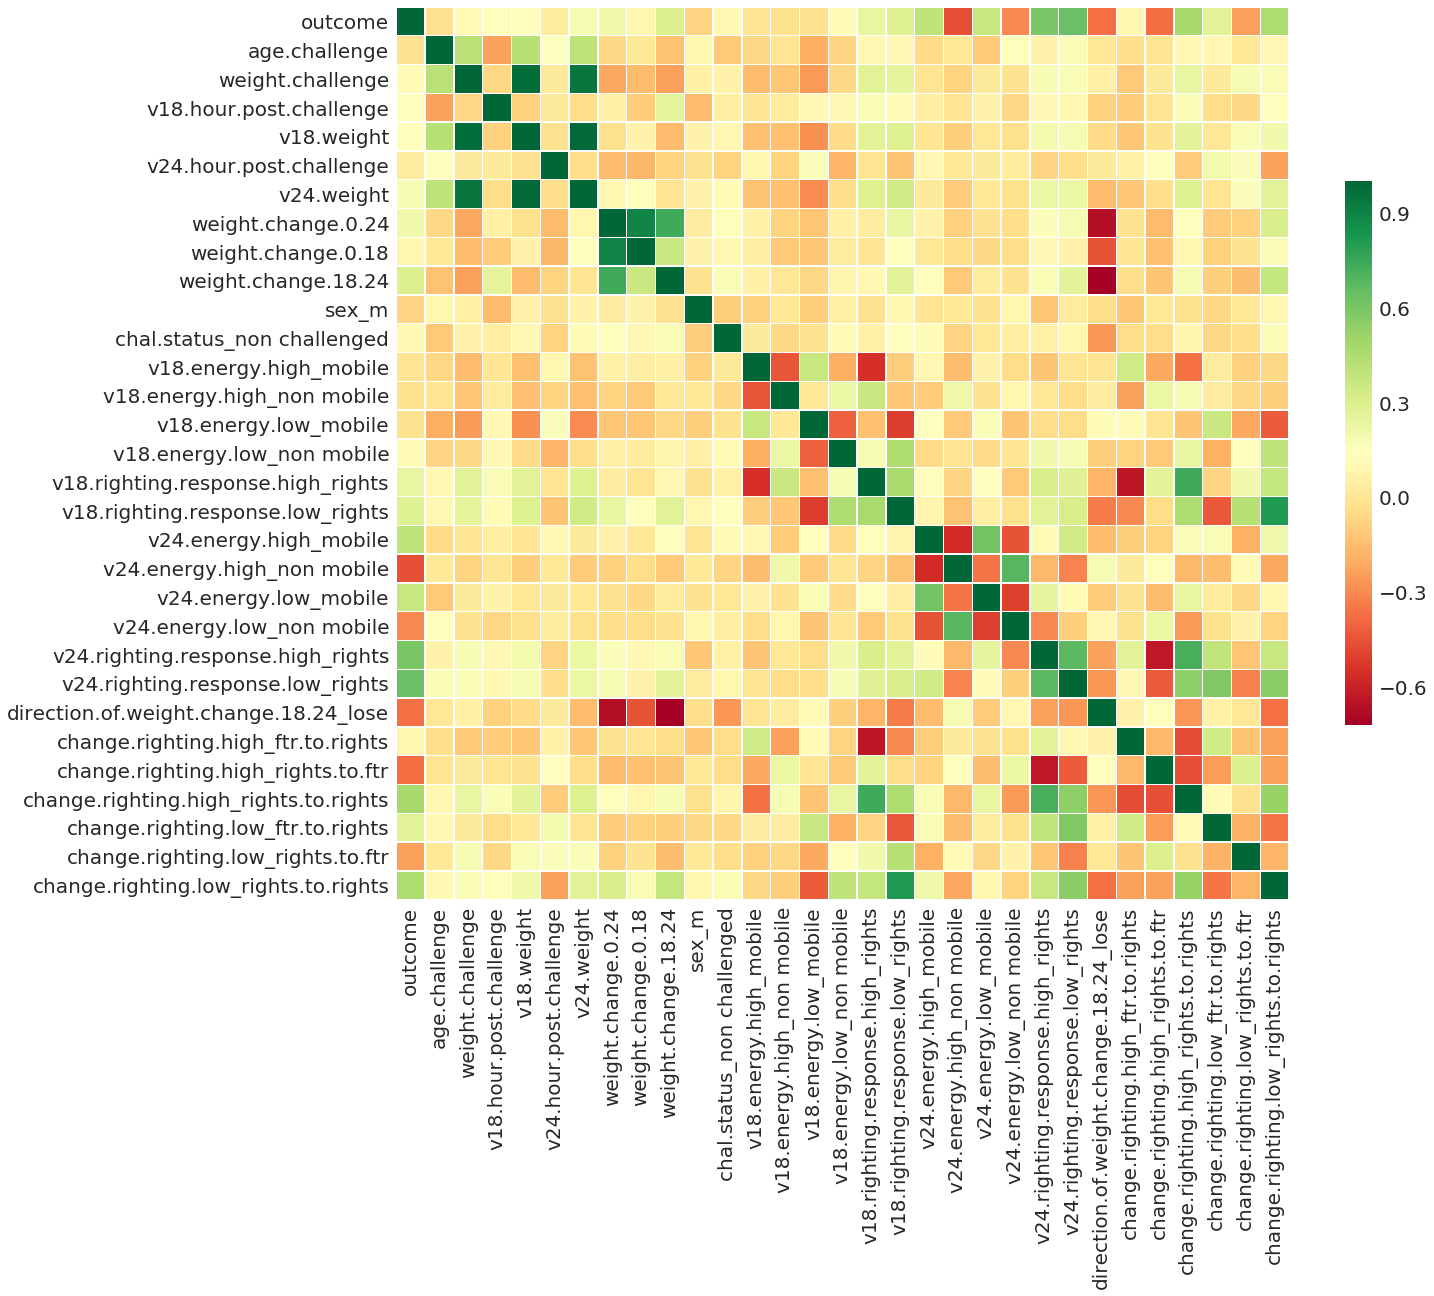

In [25]:
#import matplotlib.style as style
#style.use('seaborn')
sns.set(font_scale=2)
plt.figure(figsize=(20,20))
sns.heatmap(df_encoded.corr(), vmax=1,
            square=True,linewidths=.5,
            cbar_kws={"shrink": .5}, cmap='RdYlGn')

In [23]:
df_encoded.corr()['outcome']

outcome                                  1.000
age.challenge                           -0.017
weight.challenge                         0.110
v18.hour.post.challenge                  0.127
v18.weight                               0.131
v24.hour.post.challenge                  0.034
v24.weight                               0.178
weight.change.0.24                       0.207
weight.change.0.18                       0.088
weight.change.18.24                      0.299
sex_m                                   -0.063
chal.status_non challenged               0.096
v18.energy.high_mobile                  -0.002
v18.energy.high_non mobile              -0.027
v18.energy.low_mobile                   -0.017
v18.energy.low_non mobile                0.115
v18.righting.response.high_rights        0.239
v18.righting.response.low_rights         0.283
v24.energy.high_mobile                   0.401
v24.energy.high_non mobile              -0.451
v24.energy.low_mobile                    0.374
v24.energy.lo

In [24]:
df_encoded.corr()["outcome"] > .2


outcome                                   True
age.challenge                            False
weight.challenge                         False
v18.hour.post.challenge                  False
v18.weight                               False
v24.hour.post.challenge                  False
v24.weight                               False
weight.change.0.24                        True
weight.change.0.18                       False
weight.change.18.24                       True
sex_m                                    False
chal.status_non challenged               False
v18.energy.high_mobile                   False
v18.energy.high_non mobile               False
v18.energy.low_mobile                    False
v18.energy.low_non mobile                False
v18.righting.response.high_rights         True
v18.righting.response.low_rights          True
v24.energy.high_mobile                    True
v24.energy.high_non mobile               False
v24.energy.low_mobile                     True
v24.energy.lo

In [25]:
highly_correlated_features = df_encoded.columns[df_encoded.corr()['outcome'].abs() > .2]
list(highly_correlated_features)

['outcome',
 'weight.change.0.24',
 'weight.change.18.24',
 'v18.righting.response.high_rights',
 'v18.righting.response.low_rights',
 'v24.energy.high_mobile',
 'v24.energy.high_non mobile',
 'v24.energy.low_mobile',
 'v24.energy.low_non mobile',
 'v24.righting.response.high_rights',
 'v24.righting.response.low_rights',
 'direction.of.weight.change.18.24_lose',
 'change.righting.high_rights.to.ftr',
 'change.righting.high_rights.to.rights',
 'change.righting.low_ftr.to.rights',
 'change.righting.low_rights.to.ftr',
 'change.righting.low_rights.to.rights']

In [23]:
highly_correlated_features = highly_correlated_features.drop('outcome')
highly_correlated_features

# only include the five highly correlated features
X_subsetted = X[highly_correlated_features]
get_best_model_and_accuracy(xg, xg_params, X_subsetted, y)

Best Accuracy: 0.8873873873873874
Best Parameters: {'colsample_bytree': 1, 'max_depth': 1, 'min_child_weight': 2, 'n_estimators': 1000, 'objective': 'binary:logistic', 'subsample': 1}


We see a slight improuvement from 0.882 to 0.887 which means the feature reduction worked for XGboost, Lets see for the other classifiers

In [34]:
print("Linear Regression")
get_best_model_and_accuracy(lr, lr_params, X_subsetted, y)
print("KNN")
get_best_model_and_accuracy(knn_pipe, knn_pipe_params, X_subsetted, y)
print("Decision Tree")
get_best_model_and_accuracy(d_tree, tree_params, X_subsetted, y)
print("Random Forest")
get_best_model_and_accuracy(forest, forest_params, X_subsetted, y)
print("Gradient Boosting")
get_best_model_and_accuracy(gb, gb_params, X_subsetted, y)
print("XGBoost")
get_best_model_and_accuracy(xg, xg_params, X_subsetted, y)

Linear Regression
Best Accuracy: 0.8738738738738738
Best Parameters: {'C': 1.0, 'penalty': 'l2'}
KNN
Best Accuracy: 0.8423423423423423
Best Parameters: {'classifier__n_neighbors': 1}
Decision Tree
Best Accuracy: 0.8288288288288288
Best Parameters: {'max_depth': 5}
Random Forest
Best Accuracy: 0.8603603603603603
Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Gradient Boosting
Best Accuracy: 0.8738738738738738
Best Parameters: {'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 100}
XGBoost
Best Accuracy: 0.8873873873873874
Best Parameters: {'colsample_bytree': 1, 'max_depth': 1, 'min_child_weight': 2, 'n_estimators': 1000, 'objective': 'binary:logistic', 'subsample': 1}


In [26]:
'''
Let's bring back our scikit-learn pipelines and include our correlation choosing methodology as a part of our preprocessing phase. To do this, we will have to create a custom transformer that invokes the logic we just went through, as a pipeline-ready class.

We will call our class the CustomCorrelationChooser and it will have to implement both a fit and a transform logic, which are:

The fit logic will select columns from the features matrix that are higher than a specified threshold
The transform logic will subset any future datasets to only include those columns that were deemed important

'''

from sklearn.base import TransformerMixin, BaseEstimator


class CustomCorrelationChooser(TransformerMixin, BaseEstimator):

    def __init__(self, response, cols_to_keep=[], threshold=None):
        # store the response series
        self.response = response
        # store the threshold that we wish to keep
        self.threshold = threshold
        # initialize a variable that will eventually
        # hold the names of the features that we wish to keep
        self.cols_to_keep = cols_to_keep

    def transform(self, X):
        # the transform method simply selects the appropiate
        # columns from the original dataset
        return X[self.cols_to_keep]

    def fit(self, X, *_):
        # create a new dataframe that holds both features and response
        df = pd.concat([X, self.response], axis=1)
        # store names of columns that meet correlation threshold
        self.cols_to_keep = df.columns[df.corr(
        )[df.columns[-1]].abs() > self.threshold]
        # only keep columns in X, for example, will remove response variable
        self.cols_to_keep = [c for c in self.cols_to_keep if c in X.columns]
        
        return self


In [27]:
import copy
'''
We see that the transform method has eliminated the other columns and kept only the features that met our .2 correlation threshold. Now, let's put it all together in our pipeline, with the help of the following code:
'''

# instantiate our feature selector with the response variable set
'''
tree_pipe_params = {#'classifier__n_estimators':[10, 50, 100, 500, 1000],
'classifier__max_depth': [1, 3, 5, 7],
'classifier__min_child_weight':[1, 2, 3, 4, 5, 6, 7],
'classifier__subsample':[1, 2, 3, 4],
#'classifier__colsample_bytree':[1, 2, 3, 4],
'classifier__objective': ['reg:linear', 'binary:logistic']}
'''

tree_pipe_params = {
    'classifier__max_depth': [None, 1, 3, 5, 7]
}

ccc = CustomCorrelationChooser(response=y)

# make our new pipeline, including the selector
ccc_pipe = Pipeline([('correlation_select', ccc),
                     ('classifier', d_tree)])

# make a copy of the decisino tree pipeline parameters
ccc_pipe_params = copy.deepcopy(tree_pipe_params)
#print ccc_pipe_params

# update that dictionary with feature selector specific parameters
ccc_pipe_params.update({
    'correlation_select__threshold': [0, .1, .2, .3]})

# {'correlation_select__threshold': [0, 0.1, 0.2, 0.3], 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
pprint.pprint(ccc_pipe_params)
#print ccc.cols_to_keep

# better than original (by a little, and a bit faster on
# average overall
get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y)

ccc = CustomCorrelationChooser(threshold=.2, response=y)
ccc.fit(X)
print("Important Features Kept:")
pprint.pprint(ccc.cols_to_keep)

{'classifier__max_depth': [None, 1, 3, 5, 7],
 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8423423423423423
Best Parameters: {'classifier__max_depth': 5, 'correlation_select__threshold': 0.2}
Important Features Kept:
['weight.change.0.24',
 'weight.change.18.24',
 'v18.righting.response.high_rights',
 'v18.righting.response.low_rights',
 'v24.energy.high_mobile',
 'v24.energy.high_non mobile',
 'v24.energy.low_mobile',
 'v24.energy.low_non mobile',
 'v24.righting.response.high_rights',
 'v24.righting.response.low_rights',
 'direction.of.weight.change.18.24_lose',
 'change.righting.high_rights.to.ftr',
 'change.righting.high_rights.to.rights',
 'change.righting.low_ftr.to.rights',
 'change.righting.low_rights.to.ftr',
 'change.righting.low_rights.to.rights']


In [25]:
lr_pipe_params = {'classifier__{}'.format(k): v for k, v in lr_params.items()}

knn_pipe_params = {'classifier__{}'.format(k): v for k, v in knn_params.items()}

dt_pipe_params = {'classifier__{}'.format(k): v for k, v in tree_params.items()}

forest_pipe_params = {'classifier__{}'.format(k): v for k, v in forest_params.items()}

gb_pipe_params = {'classifier__{}'.format(k): v for k, v in gb_params.items()}

xg_pipe_params = {'classifier__{}'.format(k): v for k, v in xg_params.items()}

In [38]:
ccc = CustomCorrelationChooser(response=y)

# make our new pipeline, including the selector
ccc_pipe = Pipeline([('correlation_select', ccc),
                     ('classifier', xg)])
ccc_pipe_params = copy.deepcopy(xg_pipe_params)

ccc_pipe_params.update({'correlation_select__threshold': [0, .1, .2, .3]})

print(ccc_pipe_params)

get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y)



{'classifier__n_estimators': [10, 50, 100, 500, 1000], 'classifier__max_depth': [1, 3, 5, 7], 'classifier__min_child_weight': [1, 2, 3, 4, 5, 6, 7], 'classifier__subsample': [1, 2, 3, 4], 'classifier__colsample_bytree': [1, 2, 3, 4], 'classifier__objective': ['reg:linear', 'binary:logistic'], 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8918918918918919
Best Parameters: {'classifier__colsample_bytree': 1, 'classifier__max_depth': 1, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 100, 'classifier__objective': 'binary:logistic', 'classifier__subsample': 1, 'correlation_select__threshold': 0.2}


In [39]:
import pprint

In [40]:
def test_all_classifiers(classifier_name, classifier_var, classifier_params):
    ccc = CustomCorrelationChooser(response=y)
    # make our new pipeline, including the selector
    ccc_pipe = Pipeline([('correlation_select', ccc), ('classifier', classifier_var)])
    ccc_pipe_params = copy.deepcopy(classifier_params)
    ccc_pipe_params.update({'correlation_select__threshold': [0, .1, .2, .3]})
    pprint.pprint("Classifier :" + classifier_name)
    pprint.pprint(ccc_pipe_params)
    get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y)

In [41]:
test_all_classifiers("Decision Tree", d_tree, dt_pipe_params)
test_all_classifiers("Logistic Regression", lr, lr_pipe_params)
test_all_classifiers("KNN", knn, knn_pipe_params)
test_all_classifiers("Random Forest", forest, forest_pipe_params)
test_all_classifiers("Gradient Boosting", gb, gb_pipe_params)
#test_all_classifiers("XG Boost", xg, xg_pipe_params)

'Classifier :Decision Tree'
{'classifier__max_depth': [None, 1, 3, 5, 7],
 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8423423423423423
Best Parameters: {'classifier__max_depth': 5, 'correlation_select__threshold': 0.2}
'Classifier :Logistic Regression'
{'classifier__C': [0.1, 1.0, 10.0, 100.0],
 'classifier__penalty': ['l1', 'l2'],
 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8738738738738738
Best Parameters: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'correlation_select__threshold': 0.2}
'Classifier :KNN'
{'classifier__n_neighbors': [1, 3, 5, 7],
 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8333333333333334
Best Parameters: {'classifier__n_neighbors': 7, 'correlation_select__threshold': 0.2}
'Classifier :Random Forest'
{'classifier__max_depth': [1, 3, 5, 7],
 'classifier__n_estimators': [10, 50, 100, 500, 1000],
 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8693693693693694

In [42]:
test_all_classifiers("XG Boost", xg, xg_pipe_params)

'Classifier :XG Boost'
{'classifier__colsample_bytree': [1, 2, 3, 4],
 'classifier__max_depth': [1, 3, 5, 7],
 'classifier__min_child_weight': [1, 2, 3, 4, 5, 6, 7],
 'classifier__n_estimators': [10, 50, 100, 500, 1000],
 'classifier__objective': ['reg:linear', 'binary:logistic'],
 'classifier__subsample': [1, 2, 3, 4],
 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8918918918918919
Best Parameters: {'classifier__colsample_bytree': 1, 'classifier__max_depth': 1, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 100, 'classifier__objective': 'binary:logistic', 'classifier__subsample': 1, 'correlation_select__threshold': 0.2}


In [ ]:
do the same for all methods and get the accuracy out in a table

In [43]:
ccc = CustomCorrelationChooser(threshold=0.2, response=y)
ccc.fit(X)
print("Important Features Kept:")
pprint.pprint(ccc.cols_to_keep)
print(len(X.columns))

Important Features Kept:
['weight.change.0.24',
 'weight.change.18.24',
 'v18.righting.response.high_rights',
 'v18.righting.response.low_rights',
 'v24.energy.high_mobile',
 'v24.energy.high_non mobile',
 'v24.energy.low_mobile',
 'v24.energy.low_non mobile',
 'v24.righting.response.high_rights',
 'v24.righting.response.low_rights',
 'direction.of.weight.change.18.24_lose',
 'change.righting.high_rights.to.ftr',
 'change.righting.high_rights.to.rights',
 'change.righting.low_ftr.to.rights',
 'change.righting.low_rights.to.ftr',
 'change.righting.low_rights.to.rights']
30


## TYPE OF FEATURES SELECTION 

### FEATURE SELECTION USING HYPOTHESIS TESTING

### XGBOOST



In [44]:

# SelectKBest selects features according to the k highest scores of a
# given scoring function
from copy import *
from sklearn.feature_selection import SelectKBest

# This models a statistical test known as ANOVA
from sklearn.feature_selection import f_classif

# f_classif allows for negative values, not all do
# chi2 is a very common classification criteria but only allows for positive values
# regression has its own statistical tests
k_best = SelectKBest(f_classif)

# Make a new pipeline with SelectKBest
select_k_pipe = Pipeline([('k_best', k_best),
                          ('classifier', xg)])

#tree_pipe_params = {'classifier__n_estimators':[10, 50, 100, 500, 1000],
#'classifier__max_depth': [1, 3, 5, 7],
#'classifier__min_child_weight':[1, 2, 3, 4, 5, 6, 7],
#'classifier__subsample':[1, 2, 3, 4],
#'classifier__colsample_bytree':[1, 2, 3, 4],
#'classifier__objective': ['reg:linear', 'binary:logistic']}

select_k_best_pipe_params = deepcopy(xg_pipe_params)
# the 'all' literally does nothing to subset
select_k_best_pipe_params.update({'k_best__k': list(range(1, 20)) + ['all']})

# {'k_best__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 'all'], 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
#print select_k_best_pipe_params

# comparable to our results with correlationchooser
get_best_model_and_accuracy(select_k_pipe, select_k_best_pipe_params, X, y)

Best Accuracy: 0.8918918918918919
Best Parameters: {'classifier__colsample_bytree': 1, 'classifier__max_depth': 3, 'classifier__min_child_weight': 4, 'classifier__n_estimators': 50, 'classifier__objective': 'reg:linear', 'classifier__subsample': 1, 'k_best__k': 16}


In [96]:
k_best = SelectKBest(f_classif, k=16)
k_best.fit_transform(X, y)
# lowest 16 pvalues match what our custom correlationchooser chose before
p_values = pd.DataFrame(
    {'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')

list(p_values.head(16)['column'])

['v24.righting.response.low_rights',
 'v24.righting.response.high_rights',
 'change.righting.high_rights.to.rights',
 'change.righting.low_rights.to.rights',
 'v24.energy.high_non mobile',
 'v24.energy.high_mobile',
 'v24.energy.low_mobile',
 'change.righting.high_rights.to.ftr',
 'direction.of.weight.change.18.24_lose',
 'v24.energy.low_non mobile',
 'weight.change.18.24',
 'v18.righting.response.low_rights',
 'change.righting.low_ftr.to.rights',
 'v18.righting.response.high_rights',
 'change.righting.low_rights.to.ftr',
 'weight.change.0.24']

## TYPE OF FEATURES SELECTION 

### FEATURE SELECTION USING HYPOTHESIS TESTING

### Logistic Regression

In [98]:

# SelectKBest selects features according to the k highest scores of a
# given scoring function
from copy import *
from sklearn.feature_selection import SelectKBest

# This models a statistical test known as ANOVA
from sklearn.feature_selection import f_classif

# f_classif allows for negative values, not all do
# chi2 is a very common classification criteria but only allows for positive values
# regression has its own statistical tests
k_best = SelectKBest(f_classif)

# Make a new pipeline with SelectKBest
select_k_pipe = Pipeline([('k_best', k_best),
                          ('classifier', lr)])

select_k_best_pipe_params = deepcopy(lr_pipe_params)
# the 'all' literally does nothing to subset
select_k_best_pipe_params.update({'k_best__k': list(range(1, 20)) + ['all']})

# {'k_best__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 'all'], 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
#print select_k_best_pipe_params

# comparable to our results with correlationchooser
get_best_model_and_accuracy(select_k_pipe, select_k_best_pipe_params, X, y)

Best Accuracy: 0.8738738738738738
Best Parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l1', 'k_best__k': 11}


In [99]:
k_best = SelectKBest(f_classif, k=11)
k_best.fit_transform(X, y)
# lowest 16 pvalues match what our custom correlationchooser chose before
p_values = pd.DataFrame(
    {'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')

p_values.head(11)

,column,p_value
22,v24.righting.response.low_rights,4.699e-27
21,v24.righting.response.high_rights,6.341e-23
26,change.righting.high_rights.to.rights,2.621e-14
29,change.righting.low_rights.to.rights,4.086e-13
18,v24.energy.high_non mobile,1.524e-12
17,v24.energy.high_mobile,5.319e-10
19,v24.energy.low_mobile,8.490e-09
25,change.righting.high_rights.to.ftr,9.531e-09
23,direction.of.weight.change.18.24_lose,1.665e-08
20,v24.energy.low_non mobile,5.867e-06


## TYPE OF FEATURES SELECTION 

### FEATURE SELECTION USING HYPOTHESIS TESTING

### knn

In [100]:

# SelectKBest selects features according to the k highest scores of a
# given scoring function
from copy import *
from sklearn.feature_selection import SelectKBest

# This models a statistical test known as ANOVA
from sklearn.feature_selection import f_classif

# f_classif allows for negative values, not all do
# chi2 is a very common classification criteria but only allows for positive values
# regression has its own statistical tests
k_best = SelectKBest(f_classif)

# Make a new pipeline with SelectKBest
select_k_pipe = Pipeline([('k_best', k_best),
                          ('classifier', knn)])

select_k_best_pipe_params = deepcopy(knn_pipe_params)
# the 'all' literally does nothing to subset
select_k_best_pipe_params.update({'k_best__k': list(range(1, 20)) + ['all']})

# {'k_best__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 'all'], 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
#print select_k_best_pipe_params

# comparable to our results with correlationchooser
get_best_model_and_accuracy(select_k_pipe, select_k_best_pipe_params, X, y)

Best Accuracy: 0.8513513513513513
Best Parameters: {'classifier__n_neighbors': 7, 'k_best__k': 18}


In [101]:
k_best = SelectKBest(f_classif, k=18)
k_best.fit_transform(X, y)
# lowest 16 pvalues match what our custom correlationchooser chose before
p_values = pd.DataFrame(
    {'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')

p_values.head(18)

,column,p_value
22,v24.righting.response.low_rights,4.699e-27
21,v24.righting.response.high_rights,6.341e-23
26,change.righting.high_rights.to.rights,2.621e-14
29,change.righting.low_rights.to.rights,4.086e-13
18,v24.energy.high_non mobile,1.524e-12
17,v24.energy.high_mobile,5.319e-10
19,v24.energy.low_mobile,8.490e-09
25,change.righting.high_rights.to.ftr,9.531e-09
23,direction.of.weight.change.18.24_lose,1.665e-08
20,v24.energy.low_non mobile,5.867e-06


## TYPE OF FEATURES SELECTION 

### FEATURE SELECTION USING HYPOTHESIS TESTING

### Random Forest

In [102]:

# SelectKBest selects features according to the k highest scores of a
# given scoring function
from copy import *
from sklearn.feature_selection import SelectKBest

# This models a statistical test known as ANOVA
from sklearn.feature_selection import f_classif

# f_classif allows for negative values, not all do
# chi2 is a very common classification criteria but only allows for positive values
# regression has its own statistical tests
k_best = SelectKBest(f_classif)

# Make a new pipeline with SelectKBest
select_k_pipe = Pipeline([('k_best', k_best),
                          ('classifier', forest)])

select_k_best_pipe_params = deepcopy(forest_pipe_params)
# the 'all' literally does nothing to subset
select_k_best_pipe_params.update({'k_best__k': list(range(1, 20)) + ['all']})

# {'k_best__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 'all'], 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
#print select_k_best_pipe_params

# comparable to our results with correlationchooser
get_best_model_and_accuracy(select_k_pipe, select_k_best_pipe_params, X, y)

Best Accuracy: 0.8738738738738738
Best Parameters: {'classifier__max_depth': 3, 'classifier__n_estimators': 10, 'k_best__k': 11}


In [103]:
k_best = SelectKBest(f_classif, k='all')
k_best.fit_transform(X, y)
# lowest 16 pvalues match what our custom correlationchooser chose before
p_values = pd.DataFrame(
    {'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')

p_values

,column,p_value
22,v24.righting.response.low_rights,4.699e-27
21,v24.righting.response.high_rights,6.341e-23
26,change.righting.high_rights.to.rights,2.621e-14
29,change.righting.low_rights.to.rights,4.086e-13
18,v24.energy.high_non mobile,1.524e-12
17,v24.energy.high_mobile,5.319e-10
19,v24.energy.low_mobile,8.490e-09
25,change.righting.high_rights.to.ftr,9.531e-09
23,direction.of.weight.change.18.24_lose,1.665e-08
20,v24.energy.low_non mobile,5.867e-06


## TYPE OF FEATURES SELECTION
### FEATURE SELECTION USING HYPOTHESIS TESTING
### gradient boosting

In [105]:

# SelectKBest selects features according to the k highest scores of a
# given scoring function
from copy import *
from sklearn.feature_selection import SelectKBest

# This models a statistical test known as ANOVA
from sklearn.feature_selection import f_classif

# f_classif allows for negative values, not all do
# chi2 is a very common classification criteria but only allows for positive values
# regression has its own statistical tests
k_best = SelectKBest(f_classif)

# Make a new pipeline with SelectKBest
select_k_pipe = Pipeline([('k_best', k_best),
                          ('classifier', gb)])

select_k_best_pipe_params = deepcopy(gb_pipe_params)
# the 'all' literally does nothing to subset
select_k_best_pipe_params.update({'k_best__k': list(range(1, 20)) + ['all']})

# {'k_best__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 'all'], 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
#print select_k_best_pipe_params

# comparable to our results with correlationchooser
get_best_model_and_accuracy(select_k_pipe, select_k_best_pipe_params, X, y)

Best Accuracy: 0.8873873873873874
Best Parameters: {'classifier__max_depth': 1, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 500, 'k_best__k': 19}


In [106]:
k_best = SelectKBest(f_classif, k=19)
k_best.fit_transform(X, y)
# lowest 16 pvalues match what our custom correlationchooser chose before
p_values = pd.DataFrame(
    {'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')

p_values.head(19)

,column,p_value
22,v24.righting.response.low_rights,4.699e-27
21,v24.righting.response.high_rights,6.341e-23
26,change.righting.high_rights.to.rights,2.621e-14
29,change.righting.low_rights.to.rights,4.086e-13
18,v24.energy.high_non mobile,1.524e-12
17,v24.energy.high_mobile,5.319e-10
19,v24.energy.low_mobile,8.490e-09
25,change.righting.high_rights.to.ftr,9.531e-09
23,direction.of.weight.change.18.24_lose,1.665e-08
20,v24.energy.low_non mobile,5.867e-06


## TYPE OF FEATURES SELECTION
### FEATURE SELECTION USING HYPOTHESIS TESTING
### decision tree

In [108]:
# SelectKBest selects features according to the k highest scores of a
# given scoring function
from copy import *
from sklearn.feature_selection import SelectKBest

# This models a statistical test known as ANOVA
from sklearn.feature_selection import f_classif

# f_classif allows for negative values, not all do
# chi2 is a very common classification criteria but only allows for positive values
# regression has its own statistical tests
k_best = SelectKBest(f_classif)

# Make a new pipeline with SelectKBest
select_k_pipe = Pipeline([('k_best', k_best),
                          ('classifier', d_tree)])

select_k_best_pipe_params = deepcopy(dt_pipe_params)
# the 'all' literally does nothing to subset
select_k_best_pipe_params.update({'k_best__k': list(range(1, 20)) + ['all']})

# {'k_best__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 'all'], 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
#print select_k_best_pipe_params

# comparable to our results with correlationchooser
get_best_model_and_accuracy(select_k_pipe, select_k_best_pipe_params, X, y)

Best Accuracy: 0.8423423423423423
Best Parameters: {'classifier__max_depth': 5, 'k_best__k': 12}


In [109]:
k_best = SelectKBest(f_classif, k=12)
k_best.fit_transform(X, y)
# lowest 16 pvalues match what our custom correlationchooser chose before
p_values = pd.DataFrame(
    {'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')

p_values.head(12)

,column,p_value
22,v24.righting.response.low_rights,4.699e-27
21,v24.righting.response.high_rights,6.341e-23
26,change.righting.high_rights.to.rights,2.621e-14
29,change.righting.low_rights.to.rights,4.086e-13
18,v24.energy.high_non mobile,1.524e-12
17,v24.energy.high_mobile,5.319e-10
19,v24.energy.low_mobile,8.490e-09
25,change.righting.high_rights.to.ftr,9.531e-09
23,direction.of.weight.change.18.24_lose,1.665e-08
20,v24.energy.low_non mobile,5.867e-06


## TYPE OF FEATURES SELECTION
### FEATURE SELECTION USING MACHINE LEARNING MODELS
### Support Vector for selection

In [111]:
# SVC is a linear model that uses linear supports to
# seperate classes in euclidean space
# This model can only work for binary classification tasks
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Using a support vector classifier to get coefficients
svc_selector = SelectFromModel(LinearSVC())

svc_pipe = Pipeline([('select', svc_selector),
                     ('classifier', d_tree)])

svc_pipe_params = deepcopy(dt_pipe_params)

svc_pipe_params.update({
    'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
    'select__estimator__penalty': ['l1', 'l2'],
    'select__estimator__loss': ['squared_hinge', 'hinge'],
    'select__estimator__dual': [True, False]
})

# 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'classifier__max_depth': [1, 3, 5, 7], 'select__estimator__dual': [True, False]}
print (svc_pipe_params)

get_best_model_and_accuracy(svc_pipe,
                            svc_pipe_params,
                            X, y)


{'classifier__max_depth': [None, 1, 3, 5, 7], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__estimator__dual': [True, False]}
Best Accuracy: 0.8693693693693694
Best Parameters: {'classifier__max_depth': 5, 'select__estimator__dual': False, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l1', 'select__threshold': '2.*mean'}


In [112]:
#apply_params

# set the optimal params to the pipeline
svc_pipe.set_params(**{'select__estimator__loss': 'squared_hinge', 
 'select__threshold': '2.*mean', 
 'select__estimator__penalty': 'l1', 
 'classifier__max_depth': 5, 
 'select__estimator__dual': False})

# fit our pipeline to our data
svc_pipe.steps[0][1].fit(X, y)

# list the columns that the SVC selected by calling the get_support() method from SelectFromModel
X.columns[svc_pipe.steps[0][1].get_support()]

Index(['age.challenge', 'v24.energy.high_non mobile', 'v24.energy.low_mobile',
       'v24.righting.response.high_rights',
       'direction.of.weight.change.18.24_lose',
       'change.righting.low_rights.to.ftr'],
      dtype='object')

### SVC+LR

In [113]:
# SVC is a linear model that uses linear supports to
# seperate classes in euclidean space
# This model can only work for binary classification tasks
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Using a support vector classifier to get coefficients
svc_selector = SelectFromModel(LinearSVC())

svc_pipe = Pipeline([('select', svc_selector),
                     ('classifier', lr)])

svc_pipe_params = deepcopy(lr_pipe_params)

svc_pipe_params.update({
    'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
    'select__estimator__penalty': ['l1', 'l2'],
    'select__estimator__loss': ['squared_hinge', 'hinge'],
    'select__estimator__dual': [True, False]
})

# 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'classifier__max_depth': [1, 3, 5, 7], 'select__estimator__dual': [True, False]}
print (svc_pipe_params)

get_best_model_and_accuracy(svc_pipe,
                            svc_pipe_params,
                            X, y)

{'classifier__C': [0.1, 1.0, 10.0, 100.0], 'classifier__penalty': ['l1', 'l2'], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__estimator__dual': [True, False]}
Best Accuracy: 0.8738738738738738
Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'select__estimator__dual': True, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l2', 'select__threshold': 'mean'}


In [114]:
#apply_params

# set the optimal params to the pipeline
svc_pipe.set_params(**{'select__estimator__loss': 'squared_hinge', 
 'select__threshold': 'mean', 
 'select__estimator__penalty': 'l2', 
 'select__estimator__dual': True,
 'classifier__C': 0.1, 
 'classifier__penalty': 'l2'})

# fit our pipeline to our data
svc_pipe.steps[0][1].fit(X, y)

# list the columns that the SVC selected by calling the get_support() method from SelectFromModel
X.columns[svc_pipe.steps[0][1].get_support()]

Index(['age.challenge', 'v24.energy.high_non mobile', 'v24.energy.low_mobile',
       'v24.energy.low_non mobile', 'v24.righting.response.high_rights',
       'v24.righting.response.low_rights',
       'direction.of.weight.change.18.24_lose',
       'change.righting.high_ftr.to.rights',
       'change.righting.low_rights.to.ftr',
       'change.righting.low_rights.to.rights'],
      dtype='object')

### SVC + KNN

In [115]:
# SVC is a linear model that uses linear supports to
# seperate classes in euclidean space
# This model can only work for binary classification tasks
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Using a support vector classifier to get coefficients
svc_selector = SelectFromModel(LinearSVC())

svc_pipe = Pipeline([('select', svc_selector),
                     ('classifier', knn)])

svc_pipe_params = deepcopy(knn_pipe_params)

svc_pipe_params.update({
    'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
    'select__estimator__penalty': ['l1', 'l2'],
    'select__estimator__loss': ['squared_hinge', 'hinge'],
    'select__estimator__dual': [True, False]
})

# 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'classifier__max_depth': [1, 3, 5, 7], 'select__estimator__dual': [True, False]}
print (svc_pipe_params)

get_best_model_and_accuracy(svc_pipe,
                            svc_pipe_params,
                            X, y)

{'classifier__n_neighbors': [1, 3, 5, 7], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__estimator__dual': [True, False]}
Best Accuracy: 0.8558558558558559
Best Parameters: {'classifier__n_neighbors': 7, 'select__estimator__dual': False, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l1', 'select__threshold': '2.*mean'}


In [116]:
#apply_params

# set the optimal params to the pipeline
svc_pipe.set_params(**{'select__estimator__loss': 'squared_hinge', 
 'select__threshold': 'median', 
 'select__estimator__penalty': 'l1', 
 'select__estimator__dual': False,
 'classifier__n_neighbors': 3})

# fit our pipeline to our data
svc_pipe.steps[0][1].fit(X, y)

# list the columns that the SVC selected by calling the get_support() method from SelectFromModel
X.columns[svc_pipe.steps[0][1].get_support()]

Index(['age.challenge', 'v24.hour.post.challenge', 'v18.energy.high_mobile',
       'v18.energy.high_non mobile', 'v18.energy.low_non mobile',
       'v24.energy.high_non mobile', 'v24.energy.low_mobile',
       'v24.energy.low_non mobile', 'v24.righting.response.high_rights',
       'v24.righting.response.low_rights',
       'direction.of.weight.change.18.24_lose',
       'change.righting.high_ftr.to.rights',
       'change.righting.high_rights.to.ftr',
       'change.righting.low_rights.to.ftr',
       'change.righting.low_rights.to.rights'],
      dtype='object')

### SVC + RF

In [119]:
# SVC is a linear model that uses linear supports to
# seperate classes in euclidean space
# This model can only work for binary classification tasks
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Using a support vector classifier to get coefficients
svc_selector = SelectFromModel(LinearSVC())

svc_pipe = Pipeline([('select', svc_selector),
                     ('classifier', forest)])

svc_pipe_params = deepcopy(forest_pipe_params)

svc_pipe_params.update({
    'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
    'select__estimator__penalty': ['l1', 'l2'],
    'select__estimator__loss': ['squared_hinge', 'hinge'],
    'select__estimator__dual': [True, False]
})

# 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'classifier__max_depth': [1, 3, 5, 7], 'select__estimator__dual': [True, False]}
print (svc_pipe_params)

get_best_model_and_accuracy(svc_pipe,
                            svc_pipe_params,
                            X, y)

{'classifier__n_estimators': [10, 50, 100, 500, 1000], 'classifier__max_depth': [1, 3, 5, 7], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__estimator__dual': [True, False]}
Best Accuracy: 0.8783783783783784
Best Parameters: {'classifier__max_depth': 3, 'classifier__n_estimators': 1000, 'select__estimator__dual': False, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l1', 'select__threshold': 0.01}


In [120]:
#apply_params

# set the optimal params to the pipeline
svc_pipe.set_params(**{'select__estimator__loss': 'squared_hinge', 
 'select__threshold': 0.1, 
 'select__estimator__penalty': 'l2', 
 'select__estimator__dual': True,
 'classifier__n_estimators': 10,
 'classifier__max_depth':  5})

# fit our pipeline to our data
svc_pipe.steps[0][1].fit(X, y)

# list the columns that the SVC selected by calling the get_support() method from SelectFromModel
X.columns[svc_pipe.steps[0][1].get_support()]

Index(['age.challenge', 'v24.hour.post.challenge', 'v24.weight',
       'weight.change.0.24', 'weight.change.18.24', 'sex_m',
       'v18.energy.high_mobile', 'v18.energy.high_non mobile',
       'v18.energy.low_non mobile', 'v24.energy.high_non mobile',
       'v24.energy.low_mobile', 'v24.energy.low_non mobile',
       'v24.righting.response.high_rights', 'v24.righting.response.low_rights',
       'direction.of.weight.change.18.24_lose',
       'change.righting.high_ftr.to.rights',
       'change.righting.high_rights.to.ftr',
       'change.righting.high_rights.to.rights',
       'change.righting.low_rights.to.ftr',
       'change.righting.low_rights.to.rights'],
      dtype='object')

### SVC + GB

In [122]:
# SVC is a linear model that uses linear supports to
# seperate classes in euclidean space
# This model can only work for binary classification tasks
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Using a support vector classifier to get coefficients
svc_selector = SelectFromModel(LinearSVC())

svc_pipe = Pipeline([('select', svc_selector),
                     ('classifier', gb)])

svc_pipe_params = deepcopy(gb_pipe_params)

svc_pipe_params.update({
    'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
    'select__estimator__penalty': ['l1', 'l2'],
    'select__estimator__loss': ['squared_hinge', 'hinge'],
    'select__estimator__dual': [True, False]
})

# 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'classifier__max_depth': [1, 3, 5, 7], 'select__estimator__dual': [True, False]}
print (svc_pipe_params)

get_best_model_and_accuracy(svc_pipe,
                            svc_pipe_params,
                            X, y)

{'classifier__n_estimators': [10, 50, 100, 500, 1000], 'classifier__max_depth': [1, 3, 5, 7], 'classifier__min_samples_leaf': [1, 2, 3, 4, 5], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__estimator__dual': [True, False]}
Best Accuracy: 0.8828828828828829
Best Parameters: {'classifier__max_depth': 1, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100, 'select__estimator__dual': True, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l2', 'select__threshold': 0.01}


In [123]:
#apply_params

# set the optimal params to the pipeline
svc_pipe.set_params(**{'select__estimator__loss': 'squared_hinge', 
 'select__threshold': 0.01, 
 'select__estimator__penalty': 'l2', 
 'select__estimator__dual': True,
 'classifier__n_estimators': 100,
 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 1})

# fit our pipeline to our data
svc_pipe.steps[0][1].fit(X, y)

# list the columns that the SVC selected by calling the get_support() method from SelectFromModel
X.columns[svc_pipe.steps[0][1].get_support()]

Index(['age.challenge', 'v18.hour.post.challenge', 'v18.weight',
       'v24.hour.post.challenge', 'v24.weight', 'weight.change.0.24',
       'weight.change.0.18', 'weight.change.18.24', 'sex_m',
       'v18.energy.high_mobile', 'v18.energy.high_non mobile',
       'v18.energy.low_mobile', 'v18.energy.low_non mobile',
       'v18.righting.response.high_rights', 'v18.righting.response.low_rights',
       'v24.energy.high_mobile', 'v24.energy.high_non mobile',
       'v24.energy.low_mobile', 'v24.energy.low_non mobile',
       'v24.righting.response.high_rights', 'v24.righting.response.low_rights',
       'direction.of.weight.change.18.24_lose',
       'change.righting.high_ftr.to.rights',
       'change.righting.high_rights.to.ftr',
       'change.righting.high_rights.to.rights',
       'change.righting.low_ftr.to.rights',
       'change.righting.low_rights.to.ftr',
       'change.righting.low_rights.to.rights'],
      dtype='object')

### SVC + XG

In [52]:
# SVC is a linear model that uses linear supports to
# seperate classes in euclidean space
# This model can only work for binary classification tasks
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Using a support vector classifier to get coefficients
svc_selector = SelectFromModel(LinearSVC())

svc_pipe = Pipeline([('select', svc_selector),
                     ('classifier', xg)])

svc_pipe_params = deepcopy(xg_pipe_params)

svc_pipe_params.update({
    'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
    'select__estimator__penalty': ['l1', 'l2'],
    'select__estimator__loss': ['squared_hinge', 'hinge'],
    'select__estimator__dual': [True, False]
})

# 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'classifier__max_depth': [1, 3, 5, 7], 'select__estimator__dual': [True, False]}
print (svc_pipe_params)

get_best_model_and_accuracy(svc_pipe,
                            svc_pipe_params,
                            X, y)

{'classifier__n_estimators': [10, 50, 100, 500, 1000], 'classifier__max_depth': [1, 3, 5, 7], 'classifier__min_child_weight': [1, 2, 3, 4, 5, 6, 7], 'classifier__subsample': [1, 2, 3, 4], 'classifier__colsample_bytree': [1, 2, 3, 4], 'classifier__objective': ['reg:linear', 'binary:logistic'], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__estimator__dual': [True, False]}
Best Accuracy: 0.8873873873873874
Best Parameters: {'classifier__colsample_bytree': 1, 'classifier__max_depth': 1, 'classifier__min_child_weight': 6, 'classifier__n_estimators': 100, 'classifier__objective': 'binary:logistic', 'classifier__subsample': 1, 'select__estimator__dual': False, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l2', 'select__threshold': 0.1}


In [55]:
#apply_params

# set the optimal params to the pipeline
#svc_pipe.set_params(**{'classifier__colsample_bytree': 1, 'classifier__subsample': 1, 'select__estimator__penalty': 'l2', 'select__estimator__loss': 'hinge', 'classifier__n_estimators': 50, 'select__estimator__dual': True, 'classifier__min_child_weight': 5, 'select__threshold': 'median', 'classifier__max_depth': 1, 'classifier__objective': 'binary:logistic'})

svc_pipe.set_params(**{'classifier__colsample_bytree': 1, 'classifier__max_depth': 1, 'classifier__min_child_weight': 6, 'classifier__n_estimators': 100, 'classifier__objective': 'binary:logistic', 'classifier__subsample': 1, 'select__estimator__dual': False, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l2', 'select__threshold': 0.1})
# fit our pipeline to our data
svc_pipe.steps[0][1].fit(X, y)

# list the columns that the SVC selected by calling the get_support() method from SelectFromModel
list(X.columns[svc_pipe.steps[0][1].get_support()])

['age.challenge',
 'v24.hour.post.challenge',
 'v24.weight',
 'weight.change.0.24',
 'weight.change.18.24',
 'sex_m',
 'v18.energy.high_mobile',
 'v18.energy.high_non mobile',
 'v18.energy.low_non mobile',
 'v18.righting.response.low_rights',
 'v24.energy.high_non mobile',
 'v24.energy.low_mobile',
 'v24.energy.low_non mobile',
 'v24.righting.response.high_rights',
 'v24.righting.response.low_rights',
 'direction.of.weight.change.18.24_lose',
 'change.righting.high_ftr.to.rights',
 'change.righting.high_rights.to.ftr',
 'change.righting.high_rights.to.rights',
 'change.righting.low_rights.to.ftr',
 'change.righting.low_rights.to.rights']

## Prediction

In [28]:
## Prediction

names = X.columns

In [29]:
names

Index(['age.challenge', 'weight.challenge', 'v18.hour.post.challenge',
       'v18.weight', 'v24.hour.post.challenge', 'v24.weight',
       'weight.change.0.24', 'weight.change.0.18', 'weight.change.18.24',
       'sex_m', 'chal.status_non challenged', 'v18.energy.high_mobile',
       'v18.energy.high_non mobile', 'v18.energy.low_mobile',
       'v18.energy.low_non mobile', 'v18.righting.response.high_rights',
       'v18.righting.response.low_rights', 'v24.energy.high_mobile',
       'v24.energy.high_non mobile', 'v24.energy.low_mobile',
       'v24.energy.low_non mobile', 'v24.righting.response.high_rights',
       'v24.righting.response.low_rights',
       'direction.of.weight.change.18.24_lose',
       'change.righting.high_ftr.to.rights',
       'change.righting.high_rights.to.ftr',
       'change.righting.high_rights.to.rights',
       'change.righting.low_ftr.to.rights',
       'change.righting.low_rights.to.ftr',
       'change.righting.low_rights.to.rights'],
      dtype='obje

In [30]:

selected_features = ['weight.change.0.24', 'weight.change.18.24', 'v18.righting.response.high_rights', 'v18.righting.response.low_rights', 'v24.energy.high_mobile', 'v24.energy.high_non mobile', 'v24.energy.low_mobile', 'v24.energy.low_non mobile', 'v24.righting.response.high_rights', 'v24.righting.response.low_rights', 'direction.of.weight.change.18.24_lose', 'change.righting.high_rights.to.ftr', 'change.righting.high_rights.to.rights', 'change.righting.low_ftr.to.rights', 'change.righting.low_rights.to.ftr', 'change.righting.low_rights.to.rights']

#selected_features = ['age.challenge',
# 'v24.hour.post.challenge',
# 'v24.weight',
# 'weight.change.0.24',
# 'weight.change.18.24',
# 'sex_m',
# 'v18.energy.high_mobile',
# 'v18.energy.high_non mobile',
# 'v18.energy.low_non mobile',
# 'v18.righting.response.low_rights',
# 'v24.energy.high_non mobile',
# 'v24.energy.low_mobile',
# 'v24.energy.low_non mobile',
# 'v24.righting.response.high_rights',
# 'v24.righting.response.low_rights',
# 'direction.of.weight.change.18.24_lose',
# 'change.righting.high_ftr.to.rights',
# 'change.righting.high_rights.to.ftr',
# 'change.righting.high_rights.to.rights',
# 'change.righting.low_rights.to.ftr',
# 'change.righting.low_rights.to.rights']


In [31]:
pprint.pprint(selected_features)

['weight.change.0.24',
 'weight.change.18.24',
 'v18.righting.response.high_rights',
 'v18.righting.response.low_rights',
 'v24.energy.high_mobile',
 'v24.energy.high_non mobile',
 'v24.energy.low_mobile',
 'v24.energy.low_non mobile',
 'v24.righting.response.high_rights',
 'v24.righting.response.low_rights',
 'direction.of.weight.change.18.24_lose',
 'change.righting.high_rights.to.ftr',
 'change.righting.high_rights.to.rights',
 'change.righting.low_ftr.to.rights',
 'change.righting.low_rights.to.ftr',
 'change.righting.low_rights.to.rights']


#### The best performance comes from a XGBOOST optimized with Feature selected based on correlation

```json
{
    'classifier__colsample_bytree': [1, 2, 3, 4],
    'classifier__subsample': [1, 2, 3, 4],
    'correlation_select__threshold': [0, 0.1, 0.2, 0.3],
    'classifier__n_estimators': [10, 50, 100, 500, 1000],
    'classifier__min_child_weight': [1, 2, 3, 4, 5, 6, 7],
    'classifier__max_depth': [1, 3, 5, 7],
    'classifier__objective': ['reg:linear', 'binary:logistic']
}
Best Accuracy: 0.891891891892
Best Parameters: {
    'classifier__colsample_bytree': 1,
    'classifier__subsample': 1,
    'correlation_select__threshold': 0.2,
    'classifier__n_estimators': 100,
    'classifier__min_child_weight': 3,
    'classifier__max_depth': 1,
    'classifier__objective': 'binary:logistic'
}
```

In [32]:
X_selected_features = X[selected_features]

# Predicting outcome WITHOUT feature selection

## Base Line Models


In [50]:
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
    """
    
    fig=plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=10, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.legend(loc="lower right")
    #plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title, fontsize=14)
    set_size(fig)

Logistic Regression: 0.904762 (0.062452)
k Nearest Neighbors: 0.824286 (0.080149)
Decision Tree: 0.843810 (0.096087)


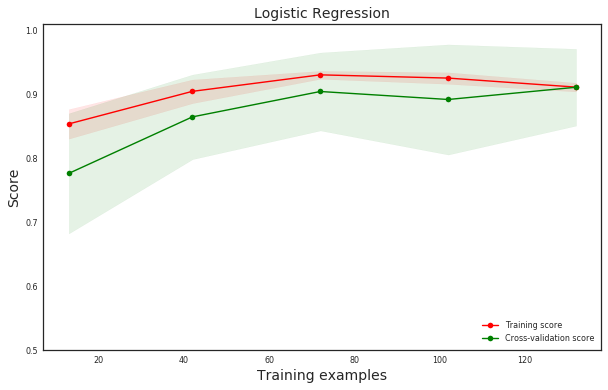

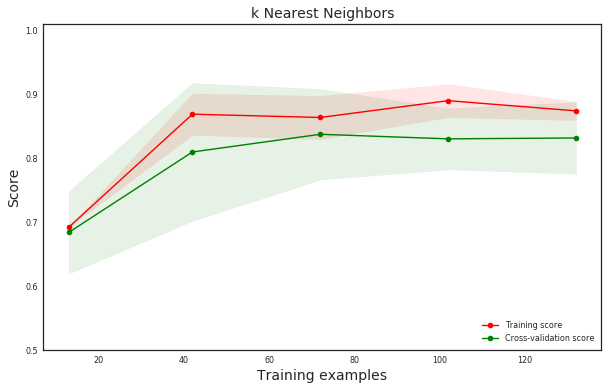

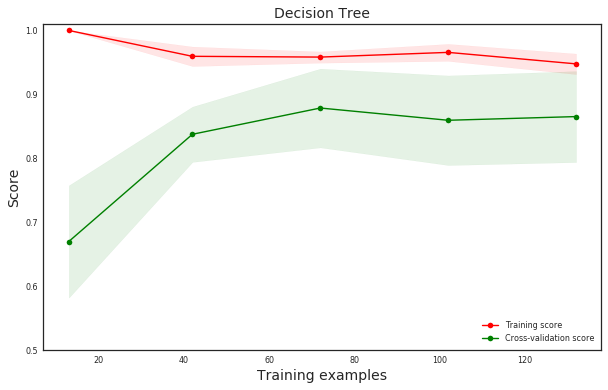

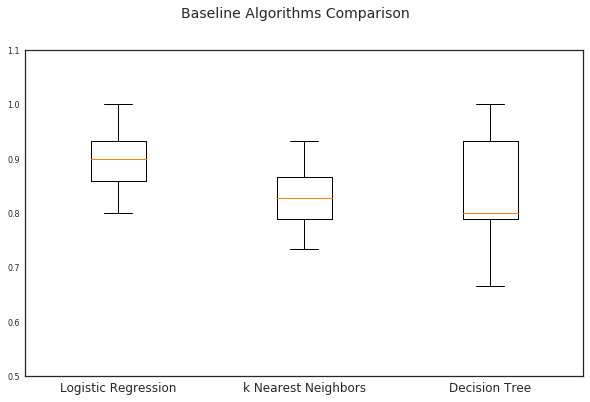

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.33, random_state=1)

from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

def base_line_models(training_set, outcome):
    # Test options and evaluation metric
    num_folds = 10
    num_instances = len(training_set)
    seed = 7
    scoring = 'accuracy'

    # Spot-Check Algorithms
    models = []
    models.append(('Logistic Regression', LogisticRegression(C=1.0, penalty='l2')))
    #models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('k Nearest Neighbors', KNeighborsClassifier(n_neighbors=7)))
    models.append(('Decision Tree', DecisionTreeClassifier(max_depth=5)))
    #models.append(('NB', GaussianNB()))
    #models.append(('SVM', SVC()))
    results = []
    names = []
    for name, model in models:
        kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
        cv_results = cross_validation.cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        plot_learning_curve(model, name, training_set, outcome, ylim=(0.5, 1.01), cv=10)
    # Compare Algorithms
    fig = plt.figure(figsize=(10,6))
    fig.suptitle('Baseline Algorithms Comparison', fontsize=14)
    ax = fig.add_subplot(111)
    plt.ylim((0.5,1.1))
    plt.boxplot(results)
    ax.set_xticklabels(names, fontsize=12)
    #set_size(fig)
    plt.show()

base_line_models(X_train, y_train)

## Ensemble Models


Gradient Boosting Machine : 0.911905 (0.060656)
Random Forest: 0.891429 (0.062044)
XGBoost: 0.904762 (0.062452)


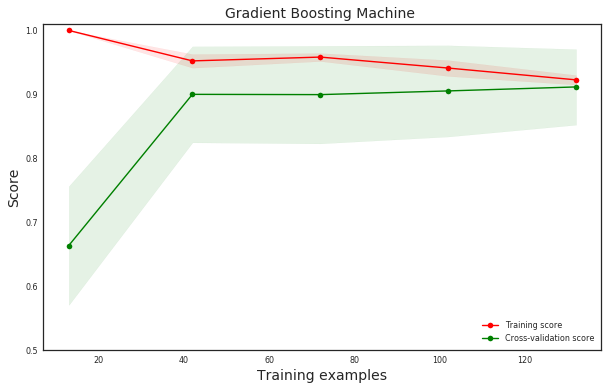

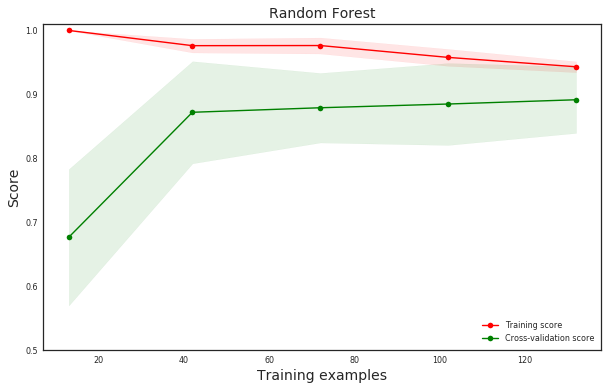

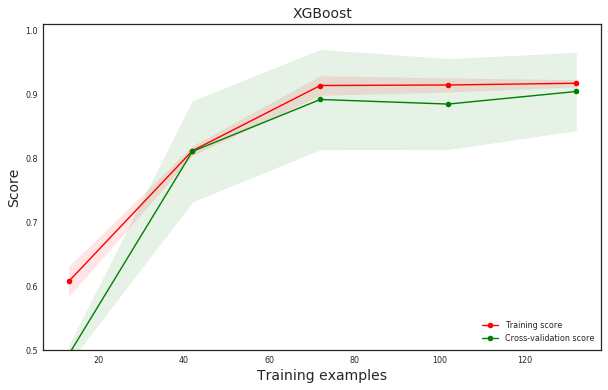

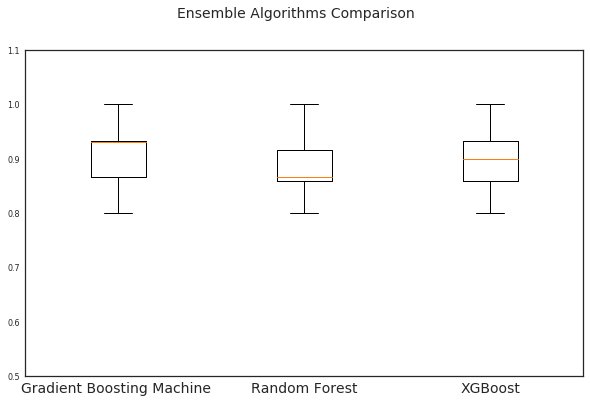

In [55]:
from sklearn.feature_selection import SelectKBest, f_classif

def ensemble_models(training_set, outcome):
    # Test options and evaluation metric
    num_folds = 10
    num_instances = len(training_set)
    seed = 7
    scoring = 'accuracy'

    # ensembles
    ensembles = []
    #ensembles.append(('AB', AdaBoostClassifier()))
    ensembles.append(('Gradient Boosting Machine ', GradientBoostingClassifier(min_samples_leaf=2, n_estimators=100, max_depth=1)))
    ensembles.append(('Random Forest', RandomForestClassifier(n_estimators=50, max_depth=5)))
    #ensembles.append(('ET', ExtraTreesClassifier()))
    ensembles.append(('XGBoost', xgboost.XGBClassifier(colsample_bytree=1, subsample=1, n_estimators=100, min_child_weight=3, max_depth=1, objective='binary:logistic')))
    results = []
    names = []
    for name, model in ensembles:
        kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
        cv_results = cross_validation.cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        plot_learning_curve(model, name, training_set, outcome, ylim=(0.5, 1.01), cv=10)

    # Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Ensemble Algorithms Comparison', fontsize=14)
    ax = fig.add_subplot(111)
    plt.ylim((0.5,1.1))
    plt.boxplot(results)
    ax.set_xticklabels(names, fontsize=14)
    set_size(fig)
    plt.show()

ensemble_models(X_train, y_train)

# Ensemble - Stacking

Logistic Regression: 0.904762 (0.062452)
Gradient Boosting: 0.911905 (0.060656)
XGBoost: 0.904762 (0.062452)
Ensemble Classifier: 0.904762 (0.062452)


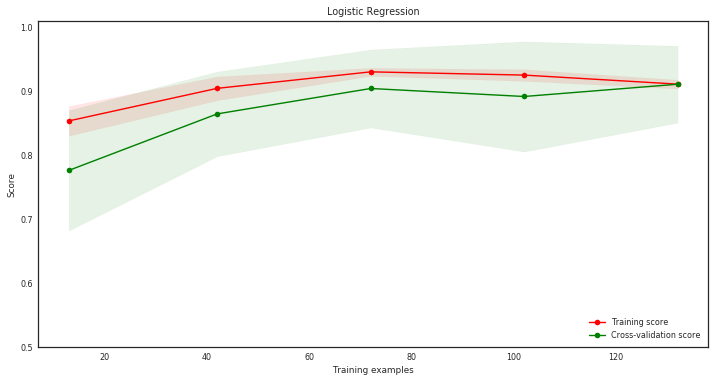

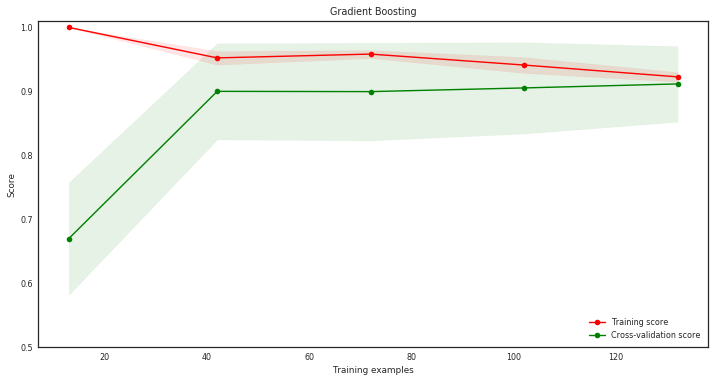

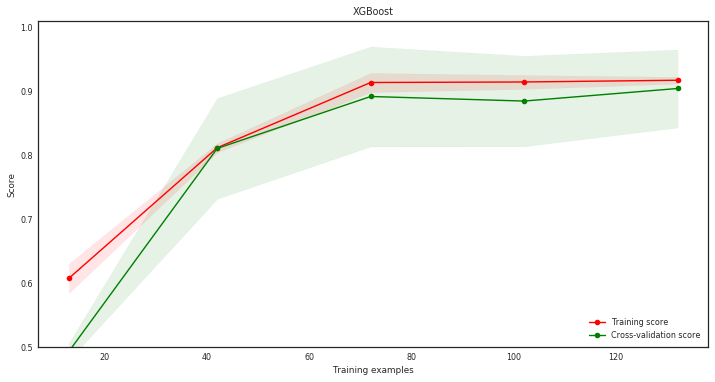

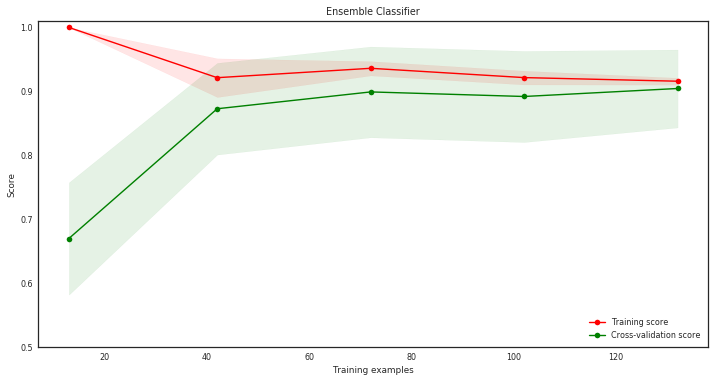

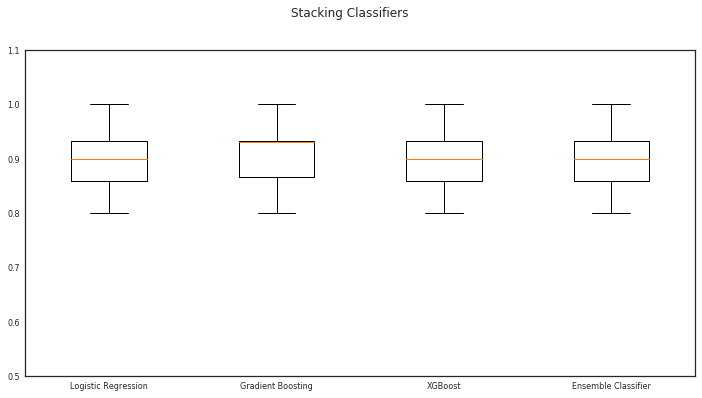

In [34]:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.33, random_state=1)


def stacking_models(training_set, outcome):
    # Test options and evaluation metric
    num_folds = 10
    num_instances = len(training_set)
    seed = 7
    scoring = 'accuracy'

    # Spot-Check Algorithms
    models = []
    clf1 = LogisticRegression(C=1.0, penalty='l2')
    clf2 = GradientBoostingClassifier(min_samples_leaf=2, n_estimators=100, max_depth=1)
    clf3 = xgboost.XGBClassifier(colsample_bytree=1, subsample=1, n_estimators=100, min_child_weight=3, max_depth=1, objective='binary:logistic')
    
    eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[1, 2, 2], voting='soft')
    models.append(('Logistic Regression', clf1))
    models.append(('Gradient Boosting', clf2))
    models.append(('XGBoost', clf3))
    models.append(('Ensemble Classifier', eclf))
    results = []
    names = []
    for name, model in models:
        kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
        cv_results = cross_validation.cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        plot_learning_curve(model, name, training_set, outcome, ylim=(0.5, 1.01), cv=10)
    # Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Stacking Classifiers')
    ax = fig.add_subplot(111)
    plt.ylim((0.5,1.1))
    plt.boxplot(results)
    ax.set_xticklabels(names)
    set_size(fig)
    plt.show()

stacking_models(X_train, y_train)

## Model Validations

In [28]:
from xgboost import plot_importance
modelplot = GradientBoostingClassifier(min_samples_leaf=2, n_estimators=100, max_depth=1)
modelplot.fit(X_train, y_train)
# plot feature importance
plot_importance(modelplot)
#plt.show(X_train, y_train)

ValueError: tree must be Booster, XGBModel or dict instance

Validation based on LR
0.8243243243243243
[[33  6]
 [ 7 28]]
             precision    recall  f1-score   support

          0       0.82      0.85      0.84        39
          1       0.82      0.80      0.81        35

avg / total       0.82      0.82      0.82        74



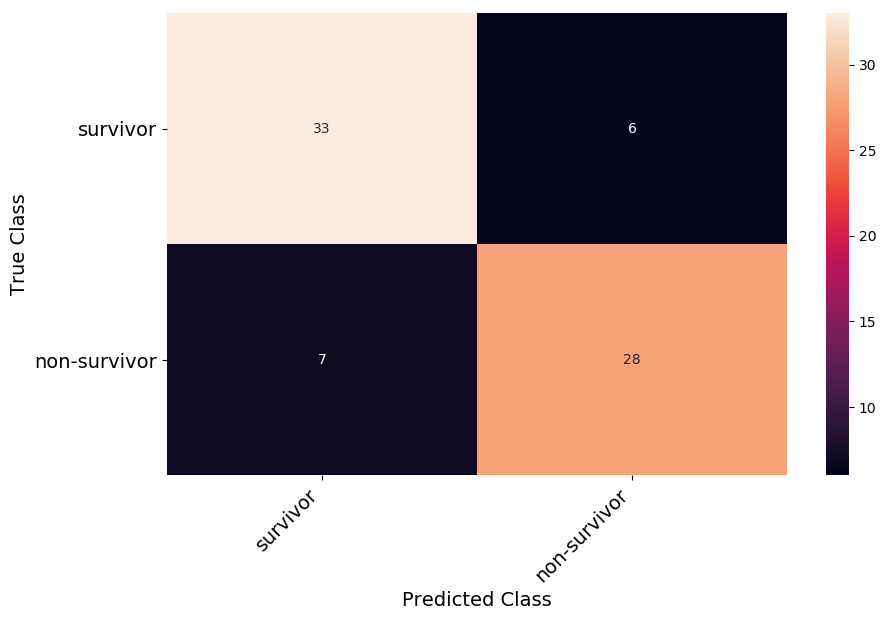

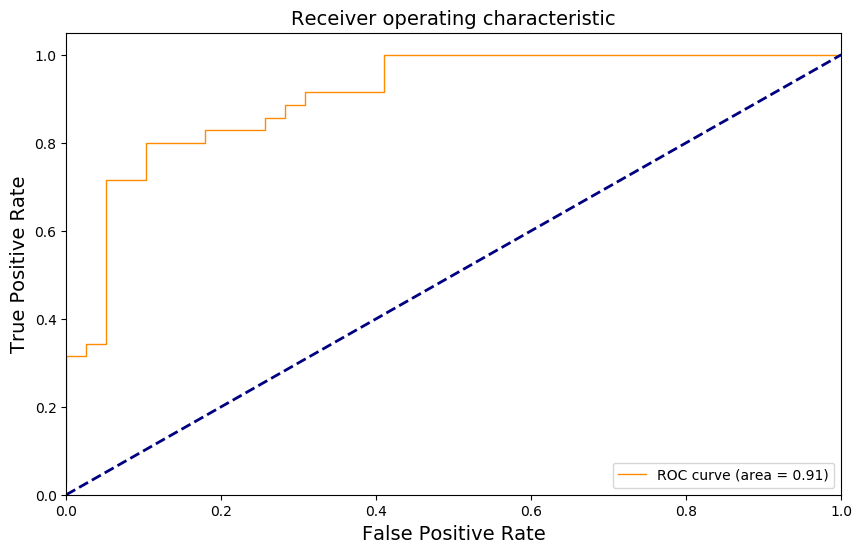

Validation based on KNN
0.7837837837837838
[[32  7]
 [ 9 26]]
             precision    recall  f1-score   support

          0       0.78      0.82      0.80        39
          1       0.79      0.74      0.76        35

avg / total       0.78      0.78      0.78        74



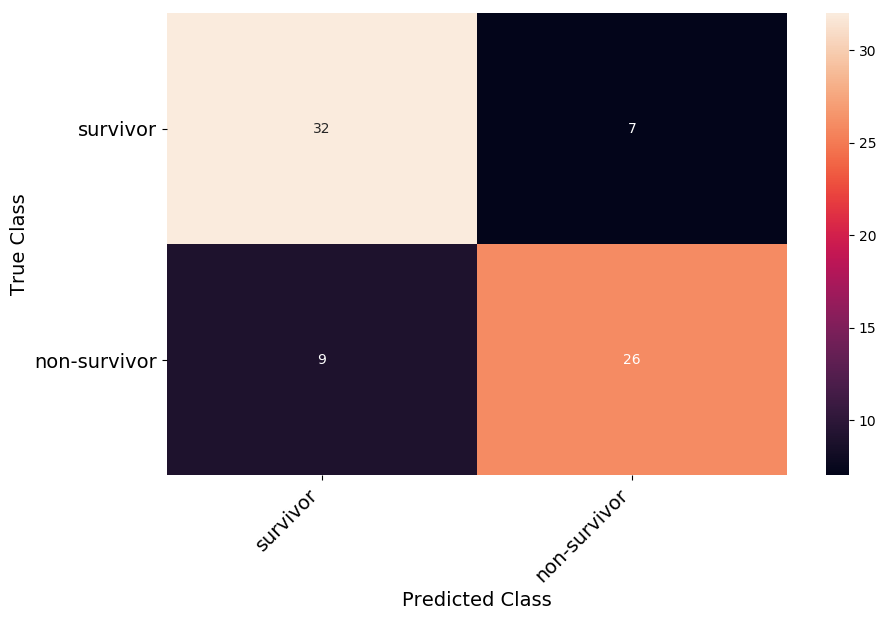

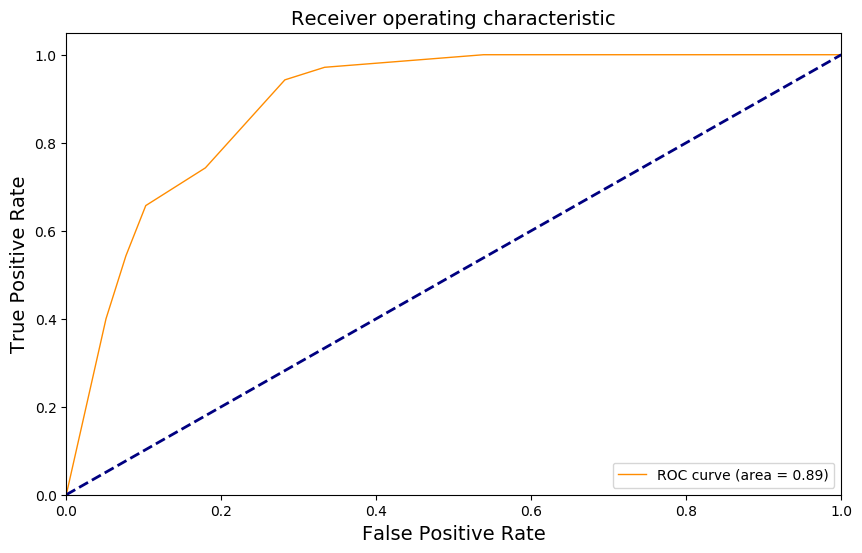

Validation based on DT
0.7837837837837838
[[30  9]
 [ 7 28]]
             precision    recall  f1-score   support

          0       0.81      0.77      0.79        39
          1       0.76      0.80      0.78        35

avg / total       0.79      0.78      0.78        74



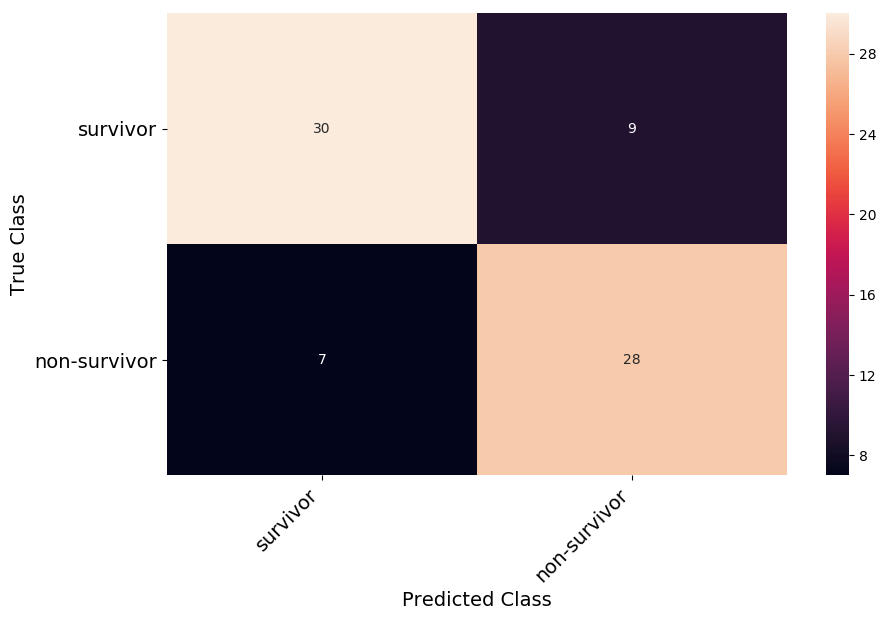

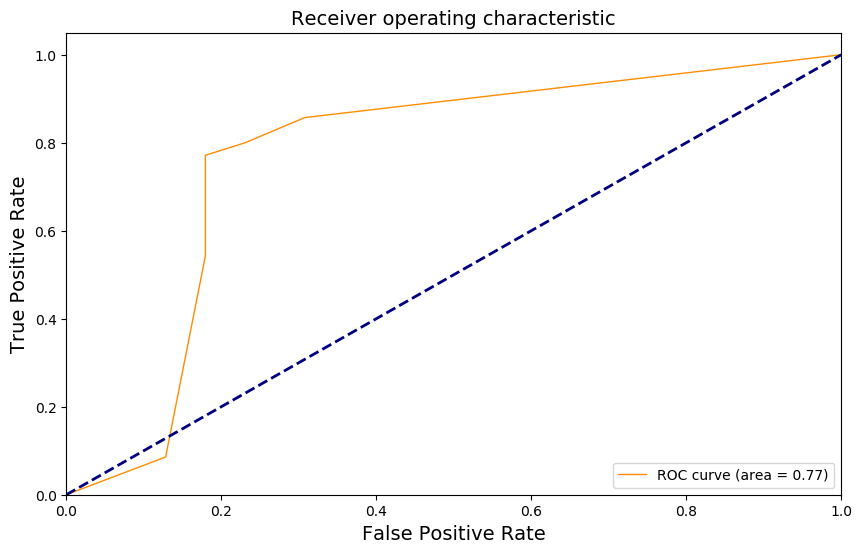

Validation based on GBM
0.8513513513513513
[[33  6]
 [ 5 30]]
             precision    recall  f1-score   support

          0       0.87      0.85      0.86        39
          1       0.83      0.86      0.85        35

avg / total       0.85      0.85      0.85        74



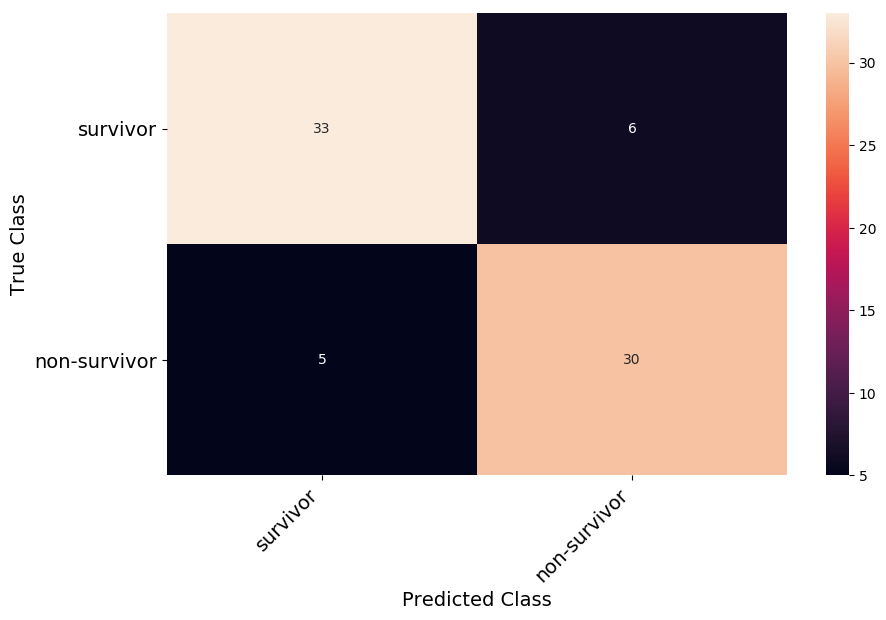

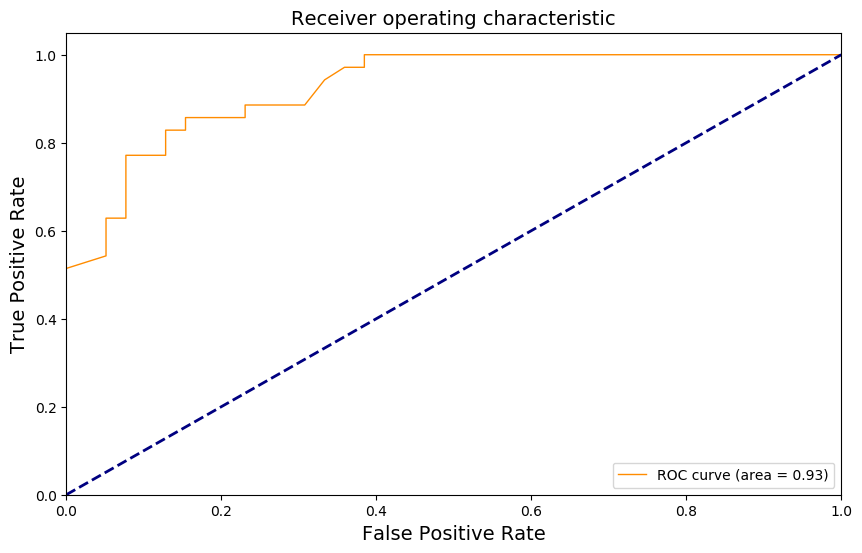

Validation based on RF
0.8378378378378378
[[33  6]
 [ 6 29]]
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        39
          1       0.83      0.83      0.83        35

avg / total       0.84      0.84      0.84        74



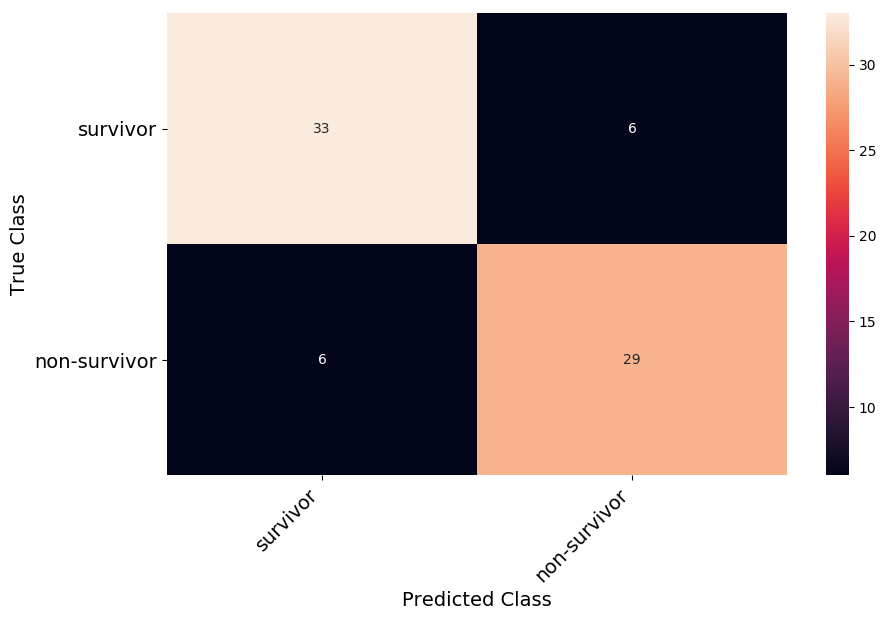

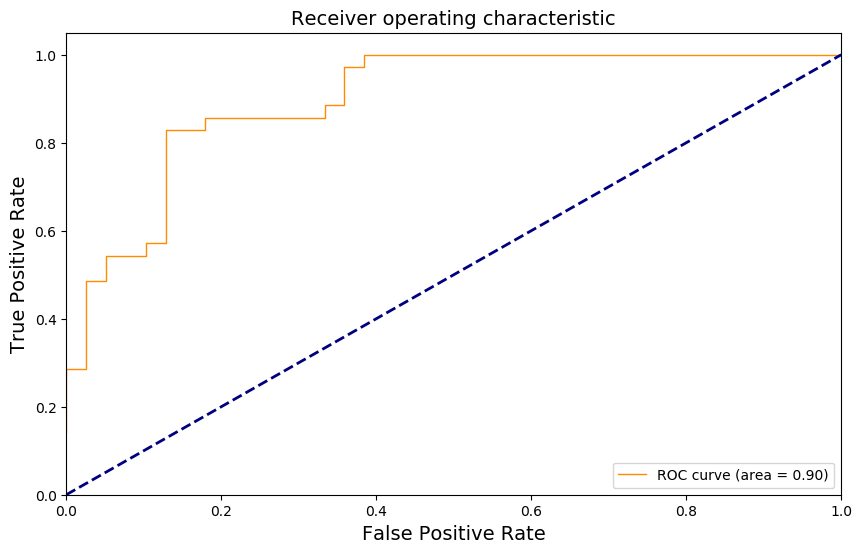

Validation based on XGB
0.8378378378378378
[[31  8]
 [ 4 31]]
             precision    recall  f1-score   support

          0       0.89      0.79      0.84        39
          1       0.79      0.89      0.84        35

avg / total       0.84      0.84      0.84        74



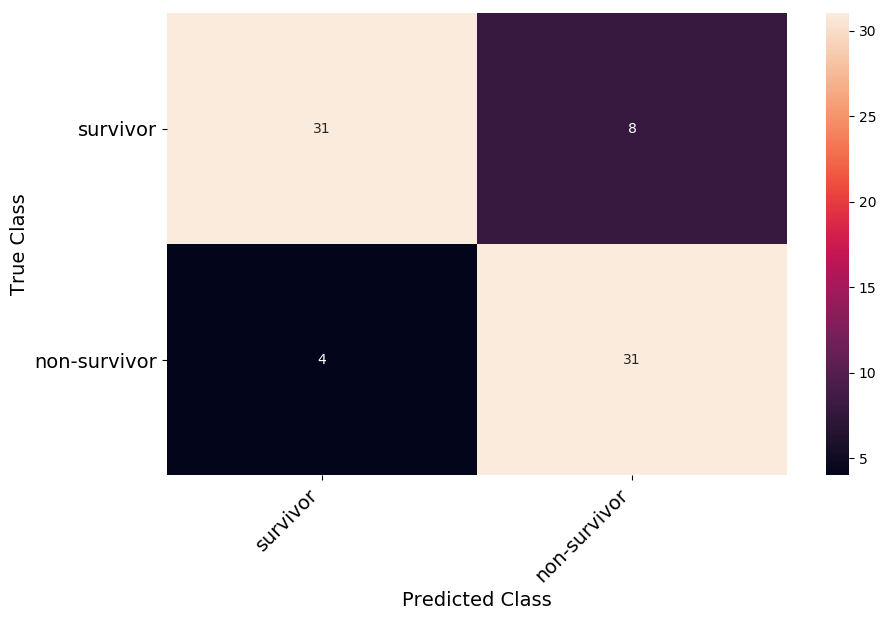

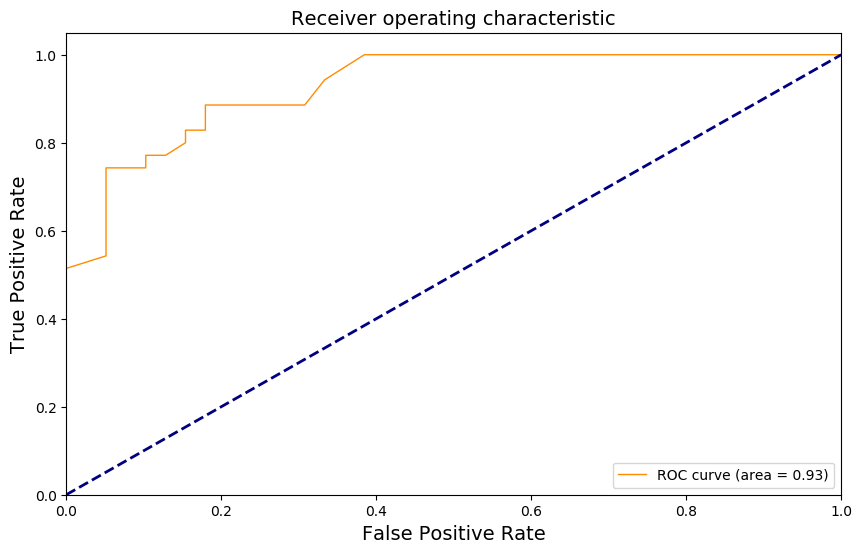

In [105]:
import itertools
import matplotlib.pyplot as plt


def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,3), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True Class', fontsize=14)
    plt.xlabel('Predicted Class',fontsize=14)
    set_size(fig)
    return fig

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(1)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.ylabel('True Class', fontsize=34)
    #plt.xlabel('Predicted Class', fontsize=49)
    

def validate_models(training_set, outcome, validation_data, validation_outcome):
    
    models = []
    
    models.append(('LR', LogisticRegression(C=1.0, penalty='l2')))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=7)))
    models.append(('DT', DecisionTreeClassifier(max_depth=5)))
    models.append(('GBM', GradientBoostingClassifier(min_samples_leaf=2, n_estimators=100, max_depth=1)))
    models.append(('RF', RandomForestClassifier(n_estimators=50, max_depth=5)))
    models.append(('XGB', xgboost.XGBClassifier(colsample_bytree=1, subsample=1, n_estimators=100, min_child_weight=3, max_depth=1, objective='binary:logistic')))

    
    for name, model in models:
        mod = model
        mod.fit(training_set, outcome)
        # estimate accuracy on validation dataset
        predictions = mod.predict(validation_data)
        print ("Validation based on " + name)
        #print "Feature Importance " 
        #print model.feature_importances_
        
        print(accuracy_score(validation_outcome, predictions))
        print(confusion_matrix(validation_outcome, predictions))
        cfmat = confusion_matrix(validation_outcome, predictions)
        #plot_confusion_matrix(cfmat, classes=[0.0, 1.0] , title='confusion matrix')
        print_confusion_matrix(cfmat, ["survivor", "non-survivor"])
        
        print(classification_report(validation_outcome, predictions))

        # calculate the fpr and tpr for all thresholds of the classification
        probs = mod.predict_proba(validation_data)
        preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(validation_outcome, preds)
        roc_auc = auc(fpr, tpr)
        
        # method I: plt
        #plt.figure(2)
        #plt.title('Receiver Operating Characteristic for ' + name)
        #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        #plt.legend(loc = 'lower right')
        #plt.plot([0, 1], [0, 1],'r--')
        #plt.xlim([0, 1])
        #plt.ylim([0, 1])
        #plt.ylabel('True Positive Rate')
        #plt.xlabel('False Positive Rate')
        #plt.show()
        lw=2
        fig=plt.figure()
        #plt.rcdefaults() 
        plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=14)
        plt.ylabel('True Positive Rate', fontsize=14)
        plt.title('Receiver operating characteristic', fontsize=14)
        plt.legend(loc="lower right")
        set_size(fig)
        plt.show()
        
validate_models(X_train, y_train, X_test, y_test)

# Phase 2

In [71]:
# Read Testing Data

df_testing = pd.read_csv('../data/No.Score.Test-2.csv')

In [72]:
df_testing.head()

,Unnamed: 0,pupID,outcome,age.challenge,sex,chal.time,litterID,chal.status,weight.challenge,dob.pups,v18.hour.post.challenge,v18.weight,v18.energy.high,v18.energy.low,v18.righting.response.high,v18.righting.response.low,v24.hour.post.challenge,v24.weight,v24.energy.high,v24.energy.low,v24.righting.response.high,v24.righting.response.low,weight.change.0.24,weight.change.0.18,weight.change.18.24,direction.of.weight.change.18.24,change.righting.high,change.righting.low,removed
0,111,F1.f.F7.2017-06-19,live,7,f,17:10,F7.2017-06-19,challenged,4.03,6/19/17,18.08,3.84,mobile,non mobile,rights,rights,24.33,3.68,mobile,non mobile,rights,rights,-0.35,-0.19,-0.16,lose,rights.to.rights,rights.to.rights,remove
1,116,F4.m.F7.2017-06-19,live,7,m,17:10,F7.2017-06-19,challenged,3.69,6/19/17,18.08,3.55,mobile,non mobile,rights,rights,24.33,3.40,lethargic,non mobile,rights,rights,-0.29,-0.14,-0.15,lose,rights.to.rights,rights.to.rights,remove
2,33,R2.m.G5.2016-04-08,live,8,m,5:30:00 PM,G5.2016-04-08,challenged,3.43,4/8/16,15.25,3.41,mobile,lethargic,ftr,ftr,25.42,3.55,lethargic,non mobile,rights,rights,0.12,-0.02,0.14,gain,ftr.to.rights,ftr.to.rights,remove
3,97,F2.f.G8.2017-08-02,live,7,f,6:00:00 PM,G8.2017-08-02,non challenged,4.28,8/2/17,18.25,4.30,lethargic,non mobile,rights,rights,23.42,4.45,non mobile,non mobile,rights,rights,0.17,0.02,0.15,gain,rights.to.rights,rights.to.rights,keep
4,37,F2.m.G1.2016-05-08,live,8,m,5:45:00 PM,G1.2016-05-08,challenged,5.00,5/8/16,18.83,4.74,mobile,lethargic,rights,rights,24.17,4.68,mobile,mobile,rights,rights,-0.32,-0.26,-0.06,lose,rights.to.rights,rights.to.rights,remove


In [73]:
def preprocess_data(df):
    df = df.drop(['Unnamed: 0', 'pupID', 'chal.time',
                  'litterID', 'dob.pups', 'removed'],  1)
    columns_to_encode = ['sex', 'chal.status', 'v18.energy.high', 'v18.energy.low', 'v18.righting.response.high', 'v18.righting.response.low', 'v24.energy.high',
                         'v24.energy.low', 'v24.righting.response.high', 'v24.righting.response.low', 'direction.of.weight.change.18.24', 'change.righting.high', 'change.righting.low']
    df_encoded = pd.get_dummies(df, drop_first=True, columns=columns_to_encode)
    df_encoded['outcome'] = pd.factorize(df_encoded['outcome'])[0]
    # Create our feature matrix
    X = df_encoded.drop('outcome', axis=1)
    # create our response variable
    y = df_encoded['outcome']
    return X, y

In [74]:
X2,y2 = preprocess_data(df_testing)

In [75]:
X2.head()

,age.challenge,weight.challenge,v18.hour.post.challenge,v18.weight,v24.hour.post.challenge,v24.weight,weight.change.0.24,weight.change.0.18,weight.change.18.24,sex_m,chal.status_non challenged,v18.energy.high_mobile,v18.energy.high_non mobile,v18.energy.low_mobile,v18.energy.low_non mobile,v18.righting.response.high_rights,v18.righting.response.low_rights,v24.energy.high_mobile,v24.energy.high_non mobile,v24.energy.low_mobile,v24.energy.low_non mobile,v24.righting.response.high_rights,v24.righting.response.low_rights,direction.of.weight.change.18.24_lose,change.righting.high_ftr.to.rights,change.righting.high_rights.to.ftr,change.righting.high_rights.to.rights,change.righting.low_ftr.to.rights,change.righting.low_rights.to.ftr,change.righting.low_rights.to.rights
0,7,4.03,18.08,3.84,24.33,3.68,-0.35,-0.19,-0.16,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,0,0,1,0,0,1
1,7,3.69,18.08,3.55,24.33,3.40,-0.29,-0.14,-0.15,1,0,1,0,0,1,1,1,0,0,0,1,1,1,1,0,0,1,0,0,1
2,8,3.43,15.25,3.41,25.42,3.55,0.12,-0.02,0.14,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0
3,7,4.28,18.25,4.30,23.42,4.45,0.17,0.02,0.15,0,1,0,0,0,1,1,1,0,1,0,1,1,1,0,0,0,1,0,0,1
4,8,5.00,18.83,4.74,24.17,4.68,-0.32,-0.26,-0.06,1,0,1,0,0,0,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1


In [76]:
y2 = np.logical_not(y2).astype(int)

In [77]:
selected_features

['weight.change.0.24',
 'weight.change.18.24',
 'v18.righting.response.high_rights',
 'v18.righting.response.low_rights',
 'v24.energy.high_mobile',
 'v24.energy.high_non mobile',
 'v24.energy.low_mobile',
 'v24.energy.low_non mobile',
 'v24.righting.response.high_rights',
 'v24.righting.response.low_rights',
 'direction.of.weight.change.18.24_lose',
 'change.righting.high_rights.to.ftr',
 'change.righting.high_rights.to.rights',
 'change.righting.low_ftr.to.rights',
 'change.righting.low_rights.to.ftr',
 'change.righting.low_rights.to.rights']

In [78]:
#X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.33, random_state=1)
#X_selected_features = X[selected_features]
#'classifier__colsample_bytree': 1, 'classifier__subsample': 1, 'classifier__n_estimators': 50, 'classifier__min_child_weight': 4, 'k_best__k': 16, 'classifier__max_depth': 3, 'classifier__objective': 'reg:linear'

X2_subsetted = X2[selected_features]


In [79]:
y2.head()

0    1
1    1
2    1
3    1
4    1
Name: outcome, dtype: int64

In [138]:
#mod = xgboost.XGBClassifier(colsample_bytree=1, subsample=1, n_estimators=100, min_child_weight=3, max_depth=1, objective='binary:logistic')
#mod.fit(X_train, y_train)


mod = LogisticRegression(C=10.0, penalty='l1')
mod.fit(X_train, y_train)

#mod = GradientBoostingClassifier(min_samples_leaf=2, n_estimators=100, max_depth=1)
#mod.fit(X_train, y_train)

#mod = RandomForestClassifier(n_estimators=50, max_depth=5)
#mod.fit(X_train, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
probs = mod.predict_proba(X2_subsetted)
print (probs)

[[1.90173755e-02 9.80982625e-01]
 [6.01455689e-02 9.39854431e-01]
 [3.43518958e-04 9.99656481e-01]
 [2.48233204e-02 9.75176680e-01]
 [1.47147471e-02 9.85285253e-01]
 [1.23726323e-01 8.76273677e-01]
 [1.34061012e-01 8.65938988e-01]
 [1.01027632e-04 9.99898972e-01]
 [8.85690355e-01 1.14309645e-01]
 [1.21719242e-04 9.99878281e-01]
 [1.08937009e-02 9.89106299e-01]
 [9.98976808e-01 1.02319218e-03]
 [9.98962397e-01 1.03760326e-03]
 [9.99162817e-01 8.37182865e-04]
 [5.31977631e-01 4.68022369e-01]
 [2.55467891e-01 7.44532109e-01]
 [9.98991019e-01 1.00898106e-03]
 [9.55937216e-01 4.40627836e-02]
 [8.19894171e-01 1.80105829e-01]
 [8.75276779e-01 1.24723221e-01]
 [9.97747080e-01 2.25291955e-03]]


In [140]:
probability_live =  probs[:,1]
probability_die = probs[:,0]

In [141]:
predicted = mod.predict(X2_subsetted)

In [142]:
result = pd.DataFrame({'Truth': y2, 'Prediction': predicted, 'Probability-Live': probability_live, 'Probability-Die': probability_die})

In [143]:
result.to_csv("predictions_testset_LR.txt", sep="\t")

In [144]:
y2.head()

0    1
1    1
2    1
3    1
4    1
Name: outcome, dtype: int64

In [145]:
list(zip(y2,predicted))

[(1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0)]

In [146]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [147]:
# generate evaluation metrics
print( accuracy_score(y2, predicted))
print( roc_auc_score(y2, probs[:, 1]))

0.8571428571428571
0.8999999999999999


             precision    recall  f1-score   support

          0       0.90      0.82      0.86        11
          1       0.82      0.90      0.86        10

avg / total       0.86      0.86      0.86        21



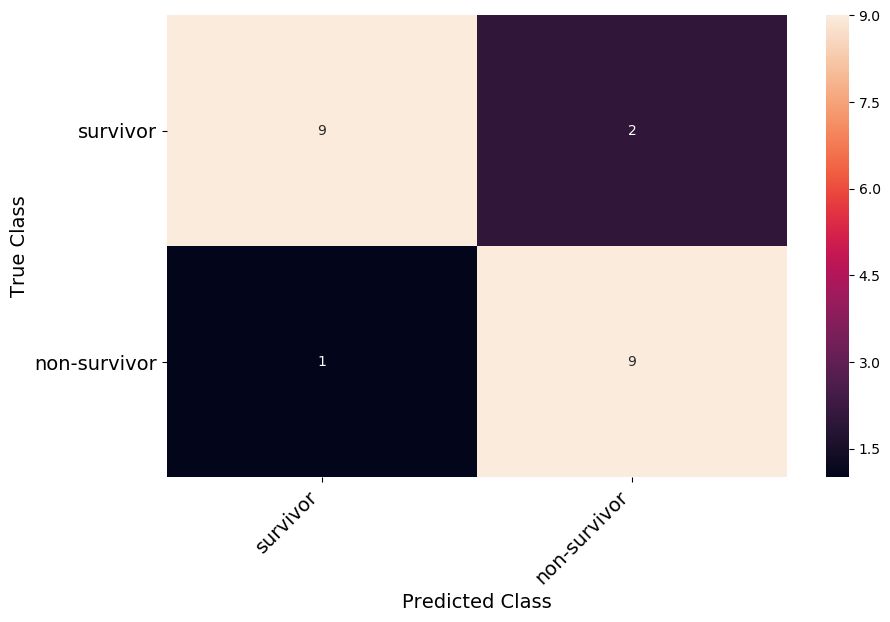

In [148]:
cm_test = confusion_matrix(y2, predicted)
print_confusion_matrix(cm_test, ["survivor", "non-survivor"])
print( classification_report(y2, predicted))

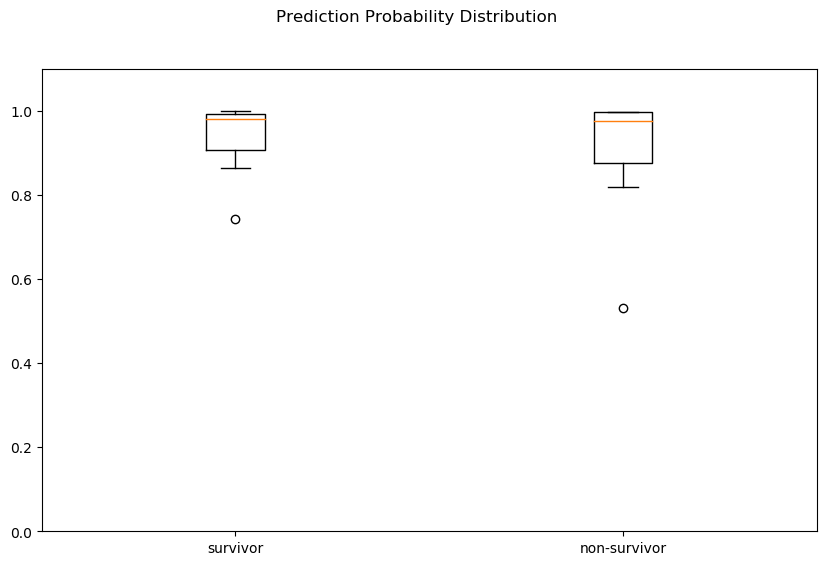

In [149]:
fig = plt.figure()
fig.suptitle('Prediction Probability Distribution')
ax = fig.add_subplot(111)
plt.ylim((0,1.1))
table = [result.loc[result['Probability-Live'] > .5]['Probability-Live'], result.loc[result['Probability-Die'] > .5]['Probability-Die']]
plt.boxplot(table)
ax.set_xticklabels(['survivor', 'non-survivor'])
set_size(fig)
plt.show()

In [ ]:
def test_model(model, testing_data, truth):
    predicted = model.predict(testing_data)
    print "Predicted output" 
    print predicted
    probs = mod.predict_proba(testing_data)
    print zip(predicted, probs) 
    print "Accuracy :" + str(accuracy_score(truth, predicted))
    print "Classification Report :"
    print classification_report(truth, predicted) 
    print confusion_matrix(truth, predicted)

In [ ]:
#scaler = StandardScaler().fit(X_test_2)
#X_test_2_scaled = scaler.transform(X_test_2)
#X_test_2_scaled

test_model(mod, X_test_2, y_test)